In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import pylab


from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import mutual_info_regression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
# import xgboost as xgb
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix,roc_curve,auc
from sklearn.metrics._plot.roc_curve import auc


In [2]:
df = pd.read_csv('creditcard.csv')
df.head()

Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28  Amount  Class  
0 -0.189115  0.133558 -0.021053  149.62      0  
1  0.125895 -0.008983  0.014724    2.69      0  
2 -0.139097 -0.055353 -0.059752  378.66      0  
3 -0.221929  0.062723  0.061458  123.50      0  
4  0.502292  0.219422  0.215153   69.99      0  

[5 rows x 31 columns]

In [3]:
df.shape

(284807, 31)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [5]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [6]:
df.describe()

Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  3.918649e-15  5.682686e-16 -8.761736e-15  2.811118e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean  -1.552103e-15  2.040130e-15 -1.698953e-15 -1.893285e-16 -3.147640e-15   
std    1.380247e+00  1.332271e+00  1.237094e+00  1.194353e+00  1.098632e+00   
min   -1.137433e+02 -2.616051e+01 -4.355724e+01 -7.321672e+01 -1.343407e+01   
25%   -6.915971e-01 -7.682956e-01 -5.540759e-01 -2.086297e-01 -6.430976e-01   
50%   -5.433583e-02 -2.741871e-01  4.010308e-02  2.235804e-02 -5.142873e-02   
75%    6.119264e-01  3.985649e-01  5.704361e-01  3.273459e-01  5.971390e-01   
max    3.480167e+01  7.330163e+01  1.205895e+02  2.000721e+01  1.559499e+01   

       ...           V21           V22           V23           V24  \
count  ...  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   ...  1.473120e-16  8.042109e-16  5.282512e-16  4.456271e-15   
std    ...  7.345240e-01  7.257016e-01  6.244603e-01  6.056471e-01   
min    ... -3.483038e+01 -1.093314e+01 -4.480774e+01 -2.836627e+00   
25%    ... -2.283949e-01 -5.423504e-01 -1.618463e-01 -3.545861e-01   
50%    ... -2.945017e-02  6.781943e-03 -1.119293e-02  4.097606e-02   
75%    ...  1.863772e-01  5.285536e-01  1.476421e-01  4.395266e-01   
max    ...  2.720284e+01  1.050309e+01  2.252841e+01  4.584549e+00   

                V25           V26           V27           V28         Amount  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  284807.000000   
mean   1.426896e-15  1.701640e-15 -3.662252e-16 -1.217809e-16      88.349619   
std    5.212781e-01  4.822270e-01  4.036325e-01  3.300833e-01     250.120109   
min   -1.029540e+01 -2.604551e+00 -2.256568e+01 -1.543008e+01       0.000000   
25%   -3.171451e-01 -3.269839e-01 -7.083953e-02 -5.295979e-02       5.600000   
50%    1.659350e-02 -5.213911e-02  1.342146e-03  1.124383e-02      22.000000   
75%    3.507156e-01  2.409522e-01  9.104512e-02  7.827995e-02      77.165000   
max    7.519589e+00  3.517346e+00  3.161220e+01  3.384781e+01   25691.160000   

               Class  
count  284807.000000  
mean        0.001727  
std         0.041527  
min         0.000000  
25%         0.000000  
50%         0.000000  
75%         0.000000  
max         1.000000  

[8 rows x 31 columns]

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

/tmp/ipykernel_15419/2284790726.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['V1'], kde = True, color = 'red', bins =10)


<Axes: xlabel='V1', ylabel='Density'>

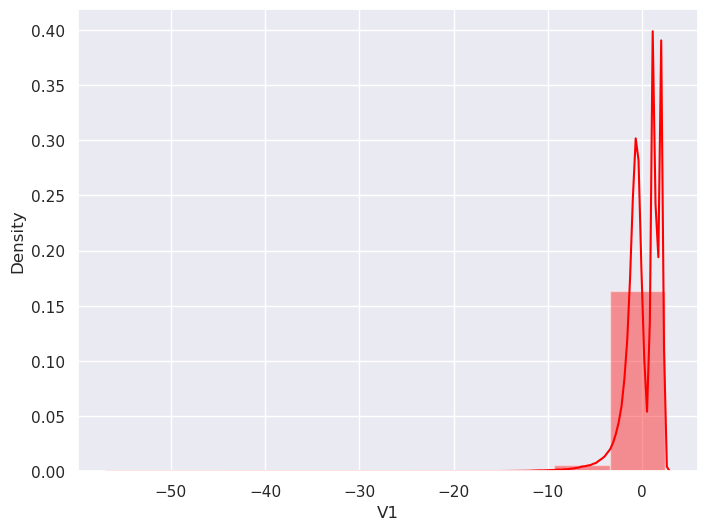

In [8]:
sns.set(rc={'figure.figsize':(8,6)})
sns.distplot(df['V1'], kde = True, color = 'red', bins =10)

<function matplotlib.pyplot.show(close=None, block=None)>

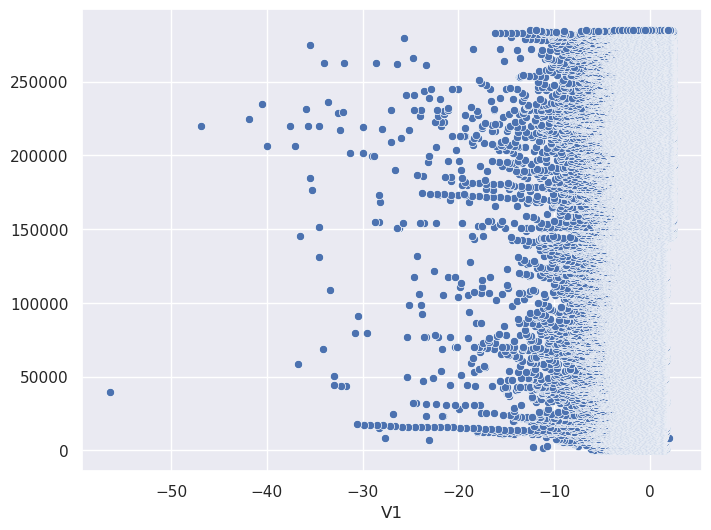

In [9]:
plt.figure(figsize = (8,6))
sns.scatterplot(x = 'V1', y = df.index, data = df)
plt.show

/tmp/ipykernel_15419/1593980670.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["V2"], kde = True, color = 'green', bins=10)


<Axes: xlabel='V2', ylabel='Density'>

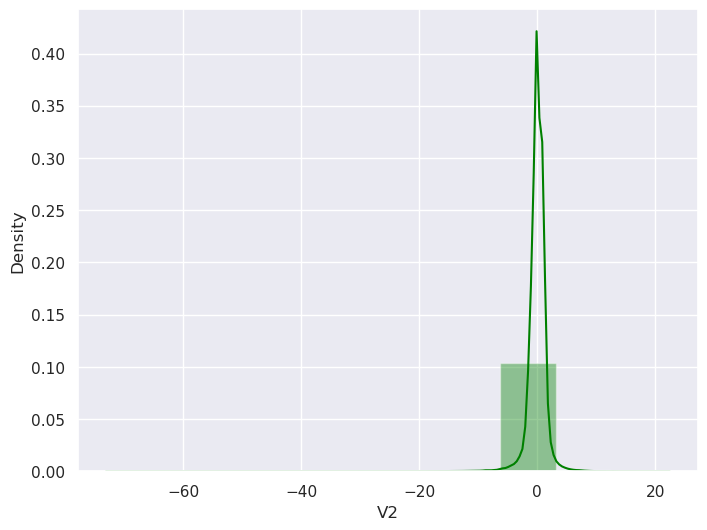

In [10]:
sns.set(rc = {"figure.figsize":(8,6)})
sns.distplot(df["V2"], kde = True, color = 'green', bins=10)

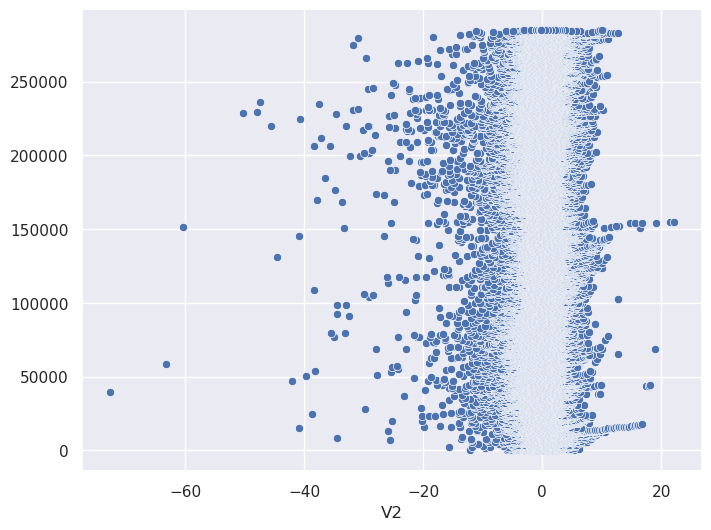

In [11]:
plt.figure(figsize=(8,6))
sns.scatterplot(x = 'V2', y = df.index, data = df)
plt.show()

/tmp/ipykernel_15419/3236607186.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['V3'], kde = True, color = 'magenta', bins = 10)


<Axes: xlabel='V3', ylabel='Density'>

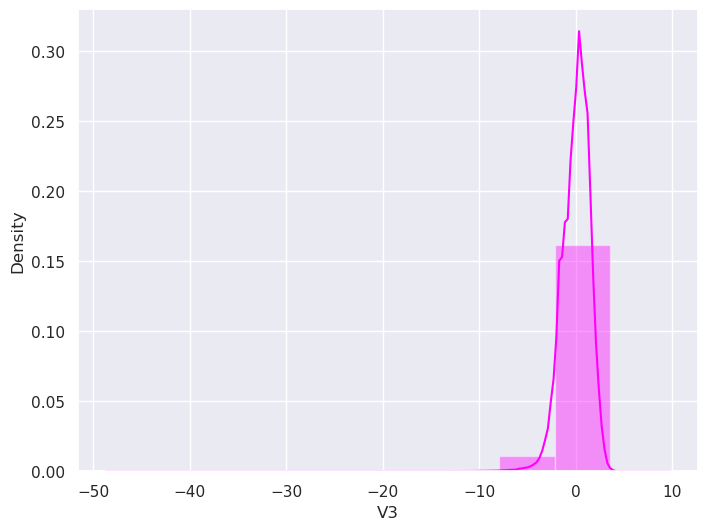

In [12]:
sns.set(rc = {'figure.figsize':(8,6)})
sns.distplot(df['V3'], kde = True, color = 'magenta', bins = 10)

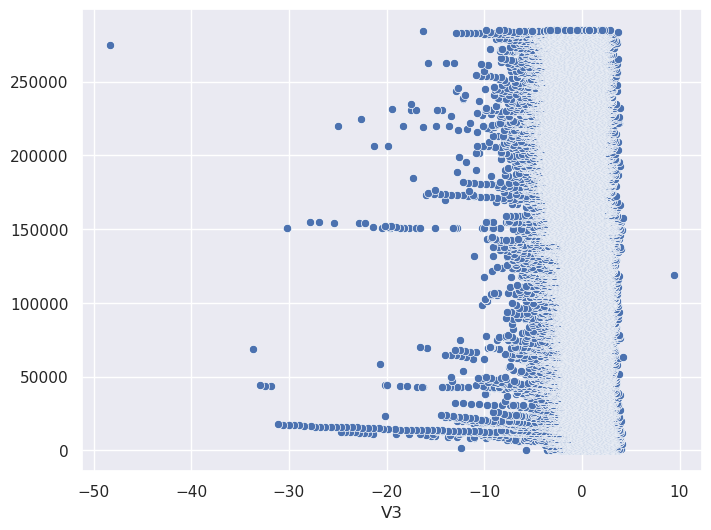

In [13]:
plt.figure(figsize=(8,6))
sns.scatterplot(x = "V3", y = df.index, data = df)
plt.show()

/tmp/ipykernel_15419/3325218730.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["V4"], kde = True, color = 'black', bins = 10)


<Axes: xlabel='V4', ylabel='Density'>

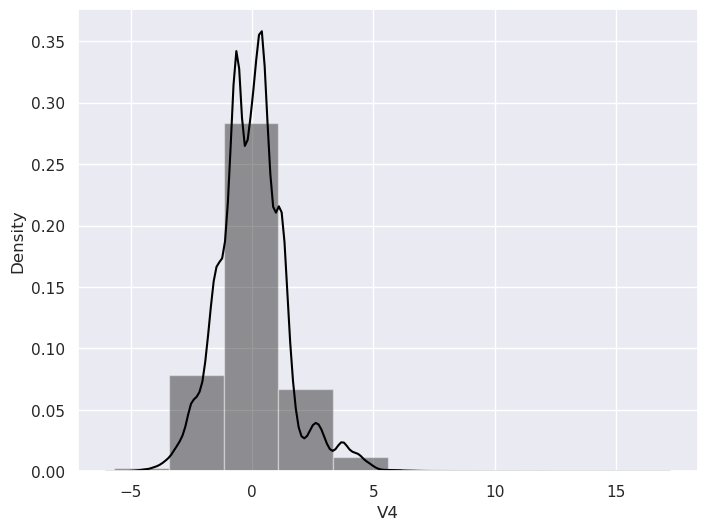

In [14]:
sns.set(rc={"figure.figsize": (8,6)})
sns.distplot(df["V4"], kde = True, color = 'black', bins = 10)

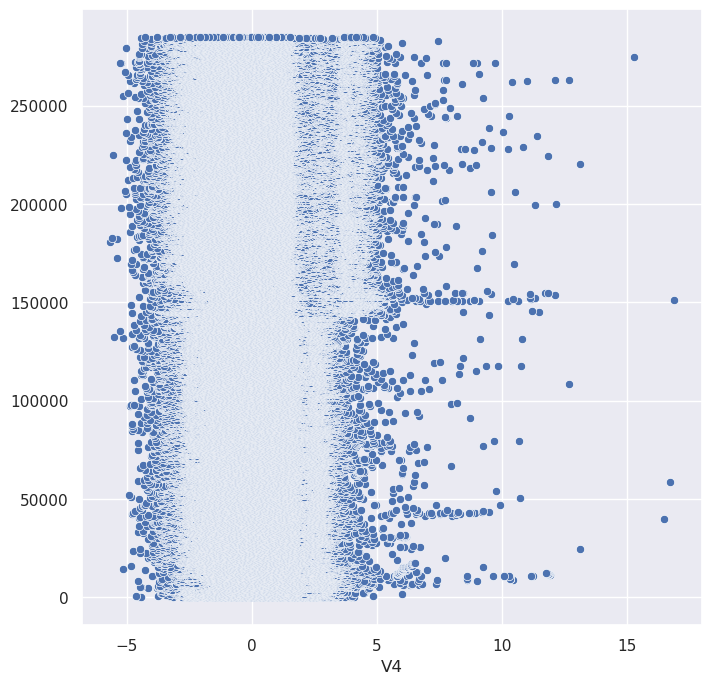

In [15]:
plt.figure(figsize = (8,8))
sns.scatterplot(x = "V4", y = df.index, data = df)
plt.show()

/tmp/ipykernel_15419/553013568.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["V5"], kde = True, color = 'orange', bins = 10)


<Axes: xlabel='V5', ylabel='Density'>

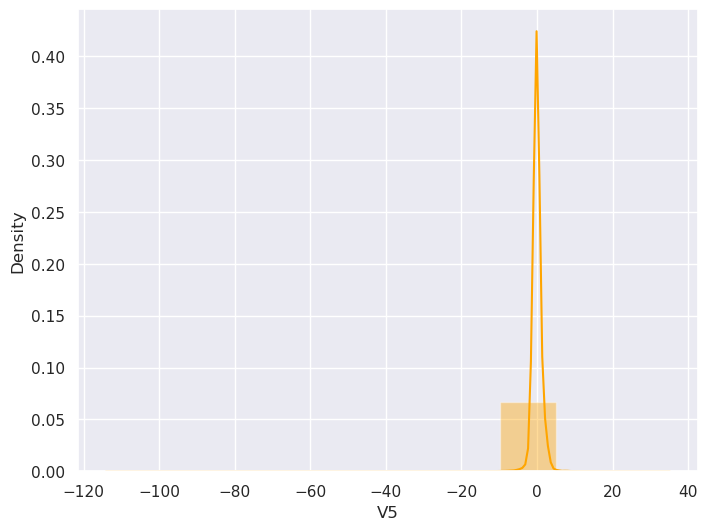

In [16]:
sns.set(rc={"figure.figsize": (8,6)})
sns.distplot(df["V5"], kde = True, color = 'orange', bins = 10)

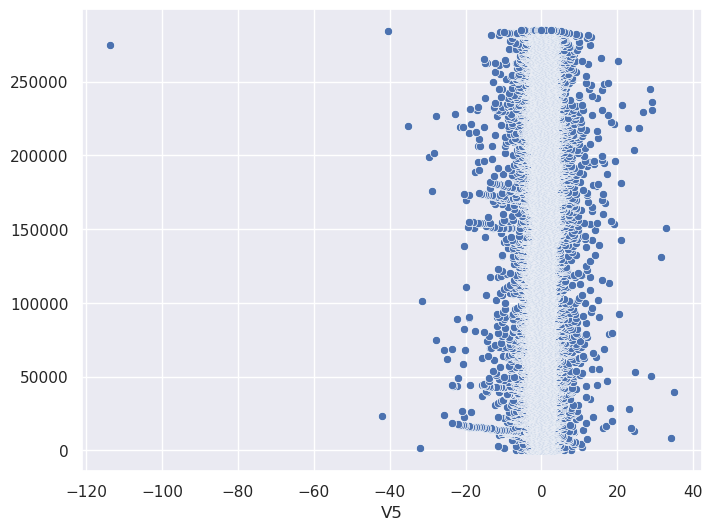

In [17]:
plt.figure(figsize = (8,6))
sns.scatterplot(x = "V5", y = df.index, data = df)
plt.show()

/tmp/ipykernel_15419/2450245705.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Amount"], kde = True, color = 'cyan', bins = 10)


<Axes: xlabel='Amount', ylabel='Density'>

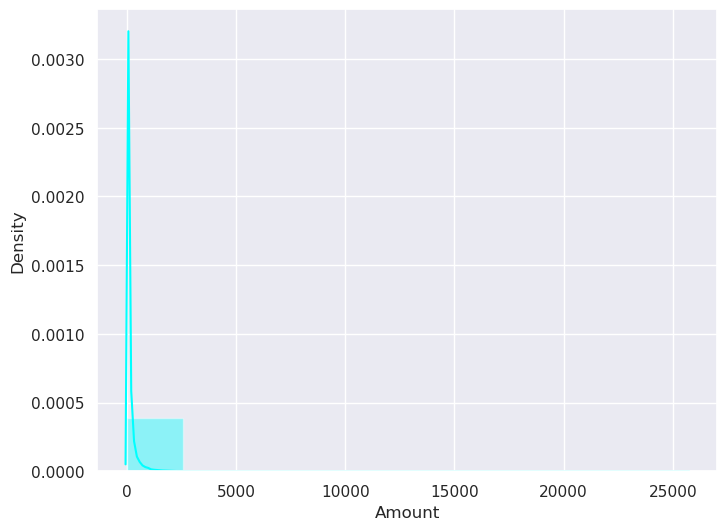

In [18]:
sns.set(rc={"figure.figsize": (8,6)})
sns.distplot(df["Amount"], kde = True, color = 'cyan', bins = 10)

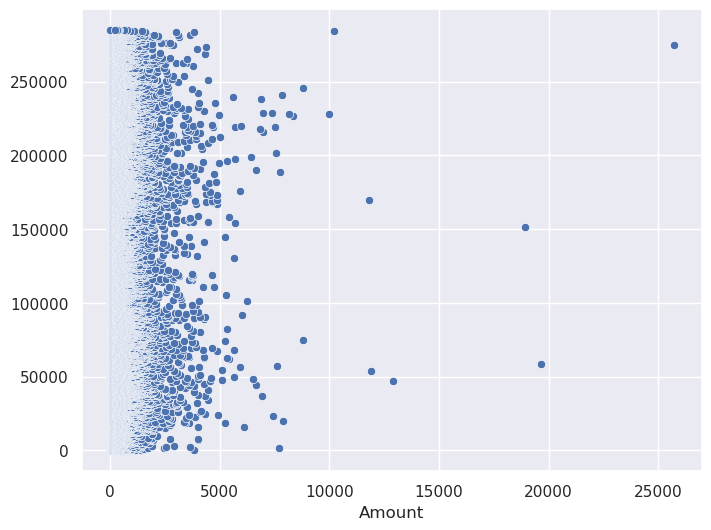

In [19]:
plt.figure(figsize = (8,6))
sns.scatterplot(x = "Amount", y = df.index, data = df)
plt.show()

<Axes: xlabel='Class', ylabel='count'>

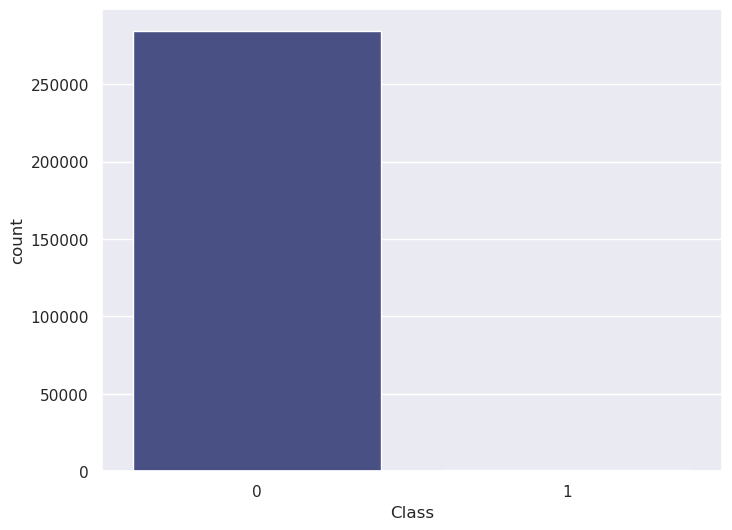

In [20]:
plt.figure(figsize = (8,6))
sns.countplot(x = 'Class', data = df, palette = 'mako')

In [21]:
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [22]:
duplicate = df.duplicated()
print(duplicate.sum())

1081


In [23]:
df.drop_duplicates(inplace = True)

In [24]:
duplicate = df.duplicated()
print(duplicate.sum())

0


In [25]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

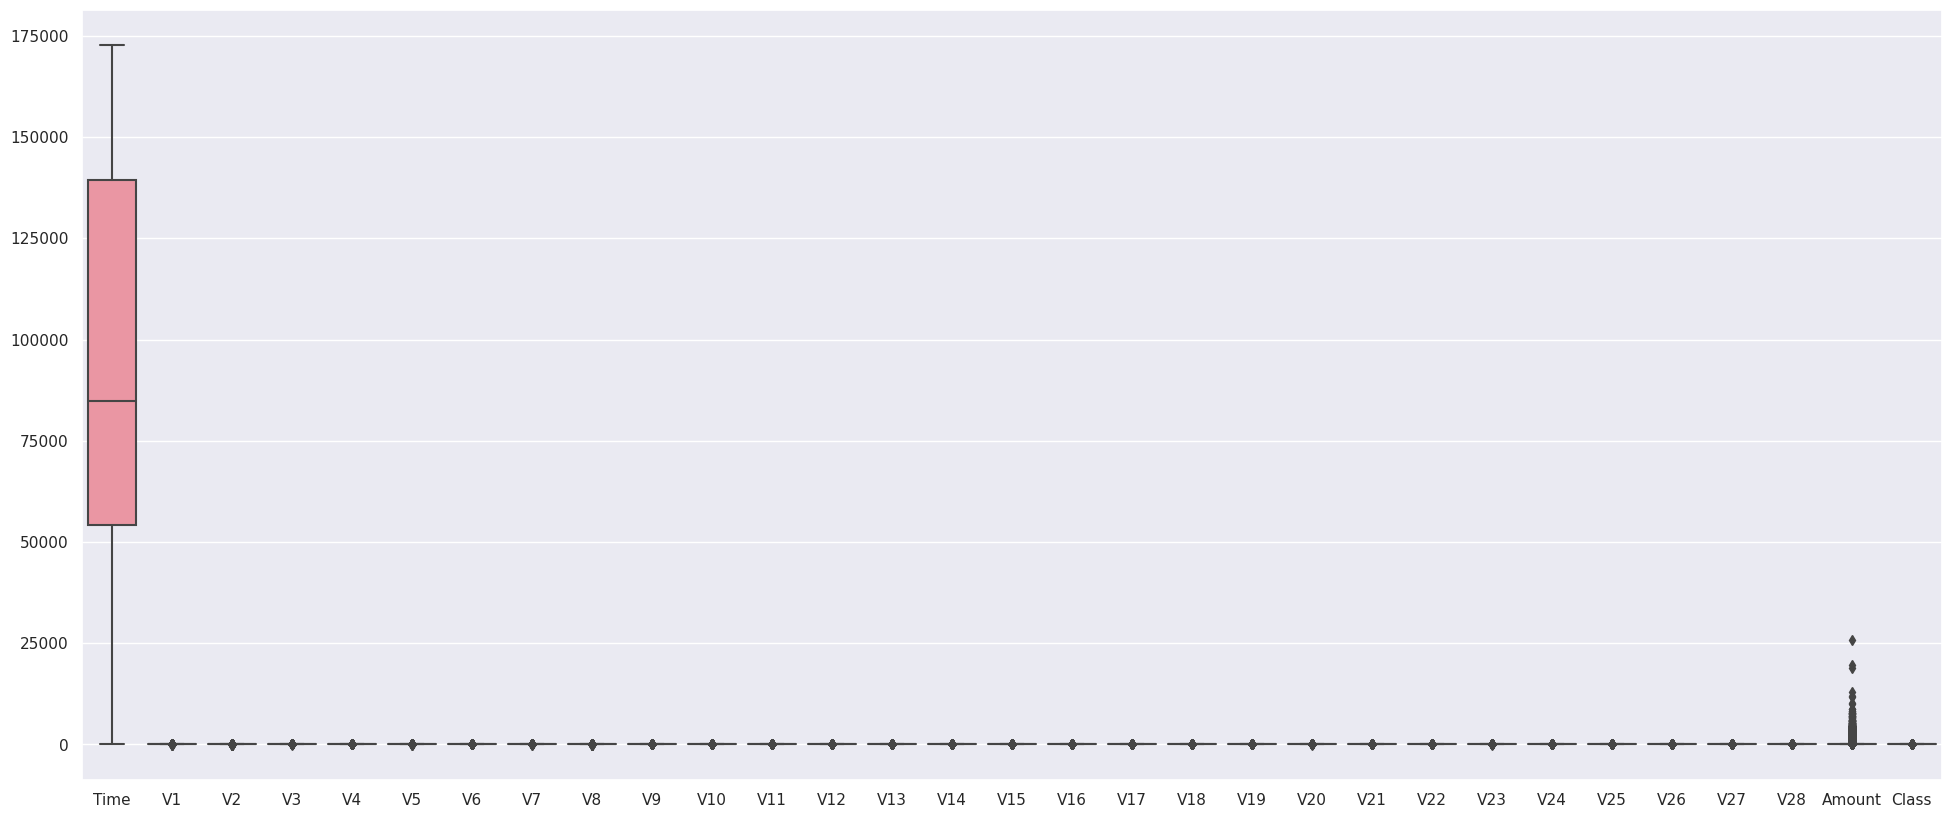

In [26]:
plt.figure(figsize = (24,10))
sns.boxplot(df)
plt.show()

In [27]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3 = col.quantile([0.25,0.75])
    IQR = Q3 - Q1
    lower_range = Q1 - (1.5 * IQR)
    upper_range = Q3 + (1.5 + IQR)
    return lower_range,upper_range

In [28]:
df.columns.get_loc("Class")

30

In [29]:
for i in df.columns:
    if df.columns.get_loc(i) == 30:
        pass
    else:
        lower_range,upper_range = remove_outlier(df[i])
        df[i] = np.where(df[i] > upper_range, upper_range, df[i])
        df[i] = np.where(df[i] < lower_range, lower_range, df[i])

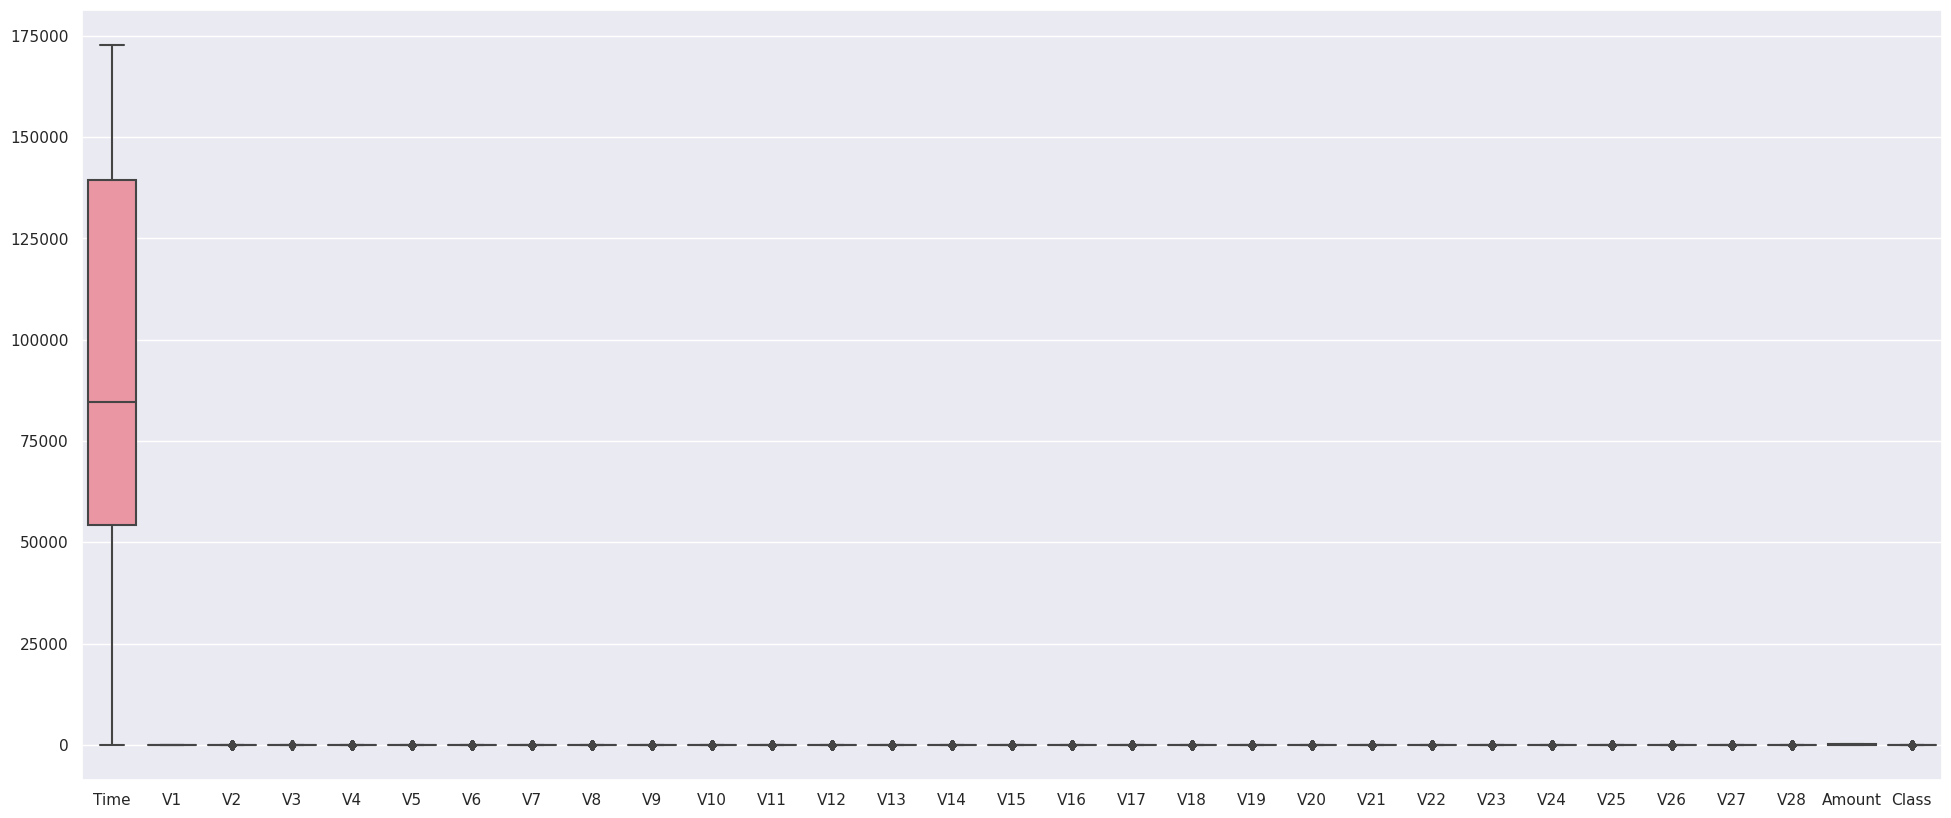

In [30]:
plt.figure(figsize = (24, 10))
sns.boxplot(df)
plt.show()

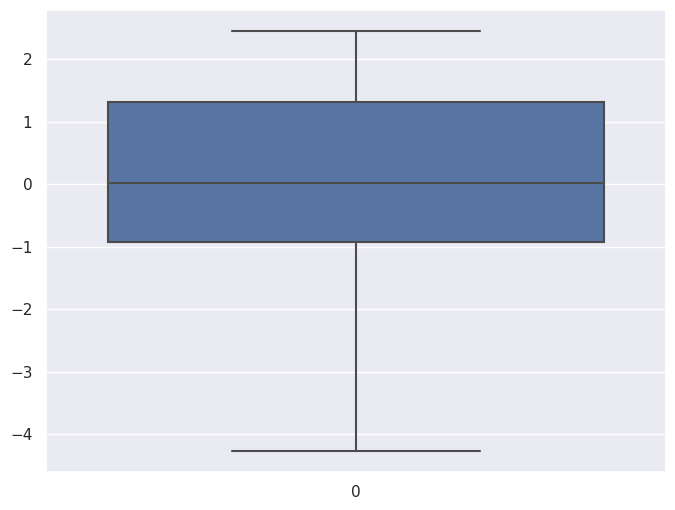

In [31]:
sns.boxplot(df['V1'])
plt.show()

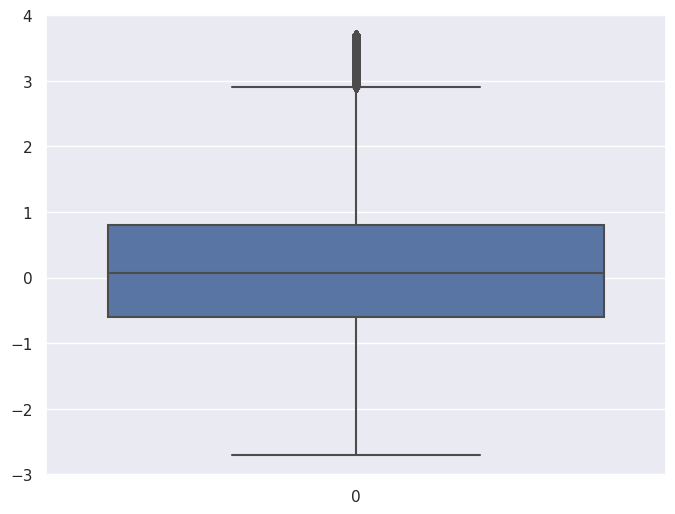

In [32]:
sns.boxplot(df['V2'])
plt.show()

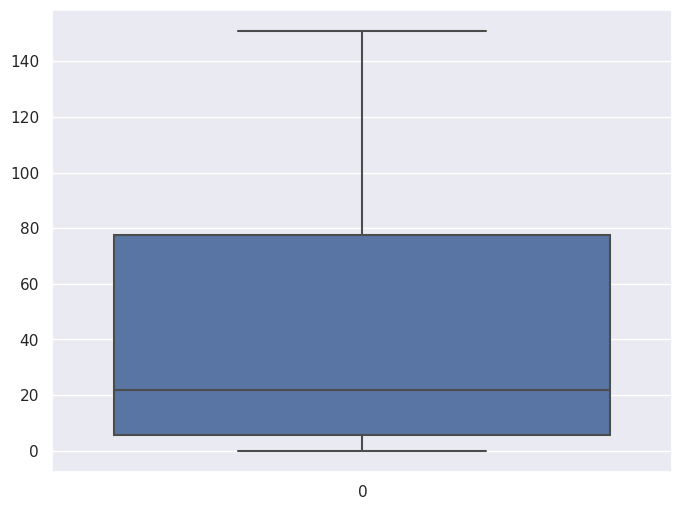

In [33]:
sns.boxplot(df['Amount'])
plt.show()

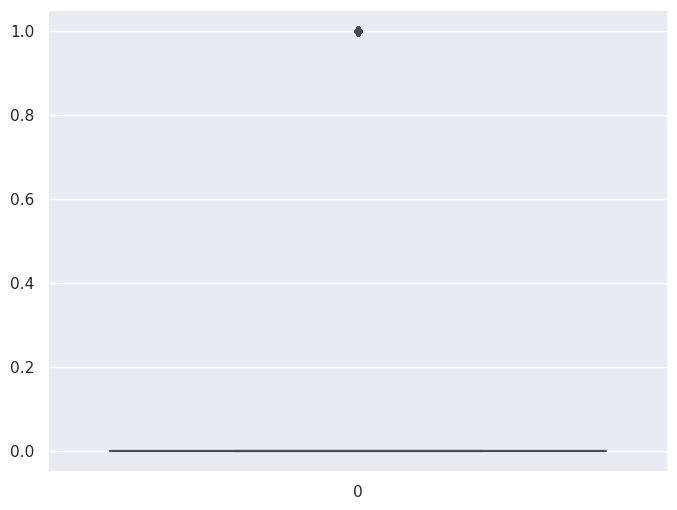

In [34]:
sns.boxplot(df['Class'])
plt.show()

In [35]:
df['Class'].value_counts()

0    283253
1       473
Name: Class, dtype: int64

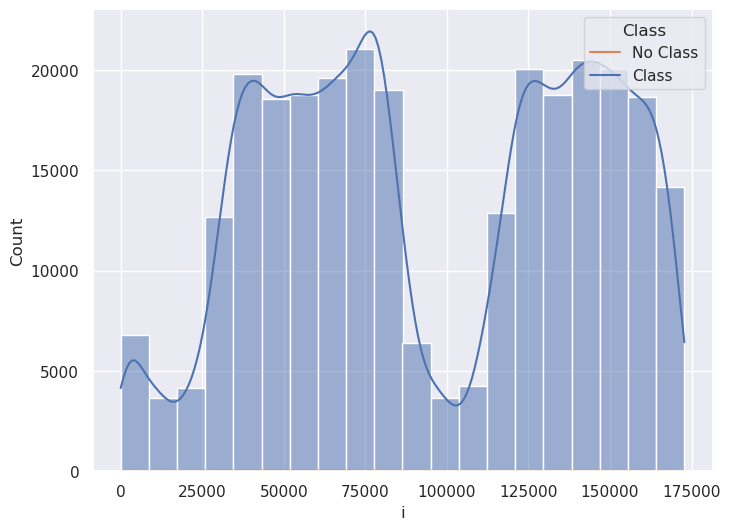

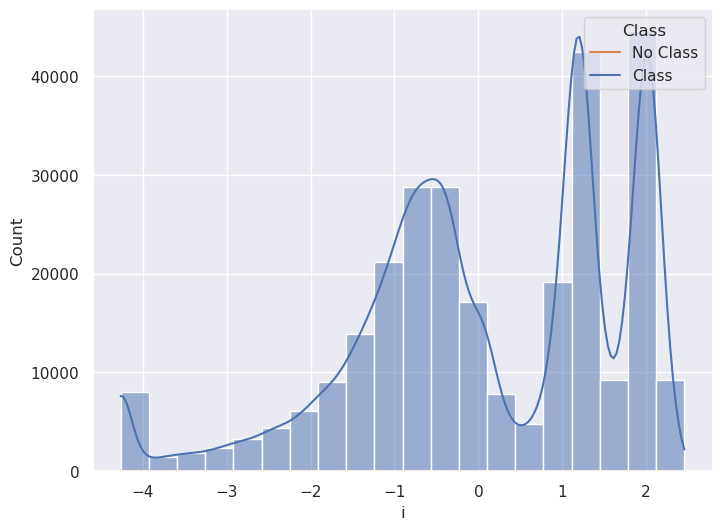

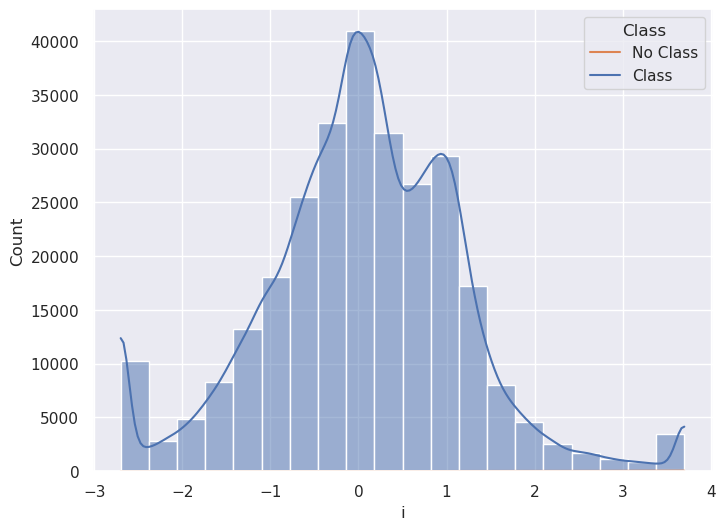

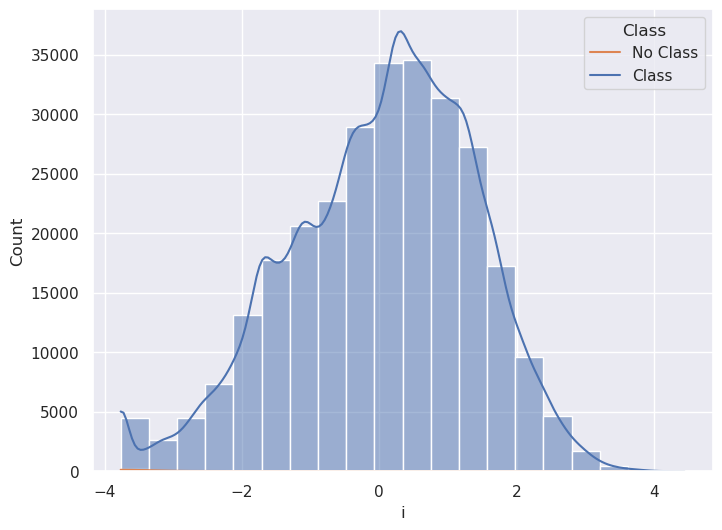

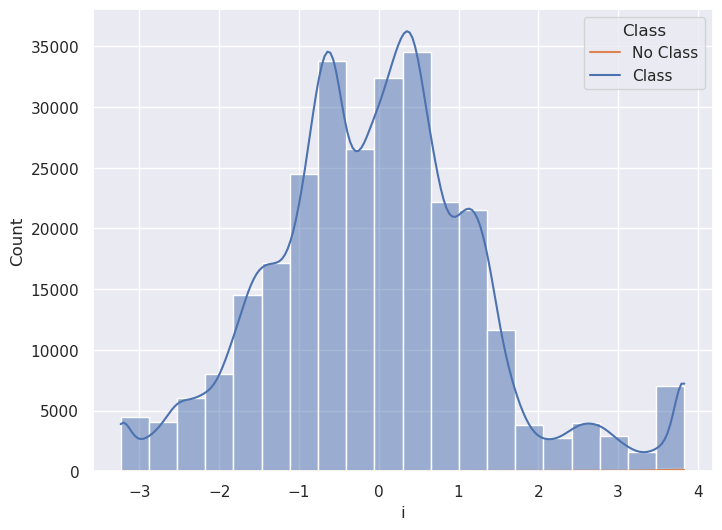

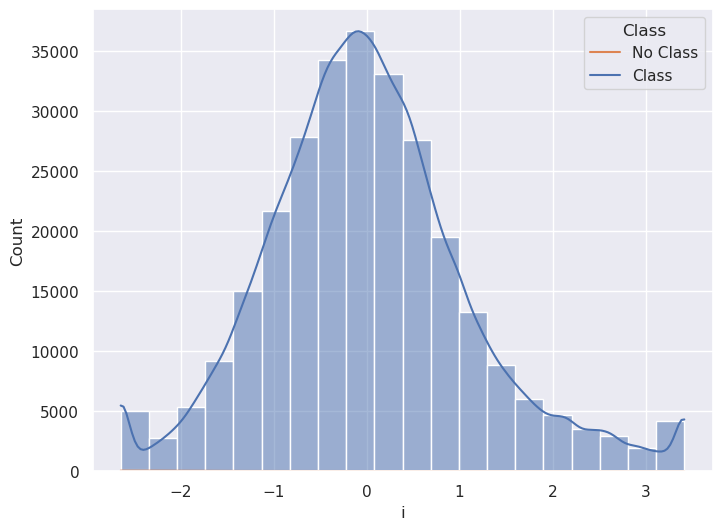

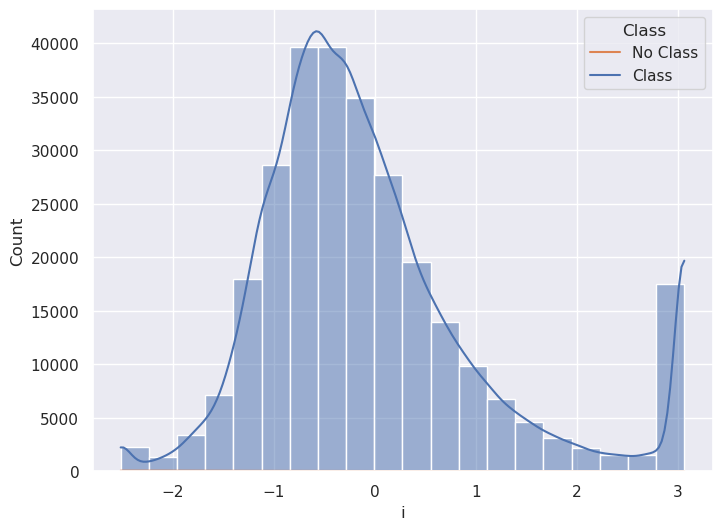

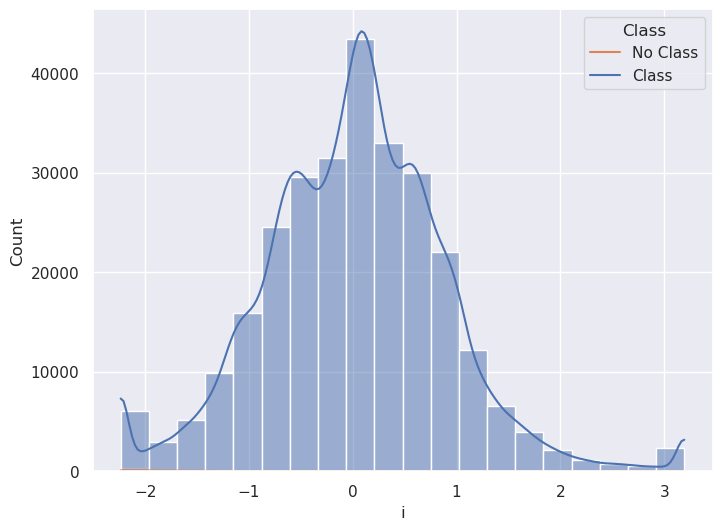

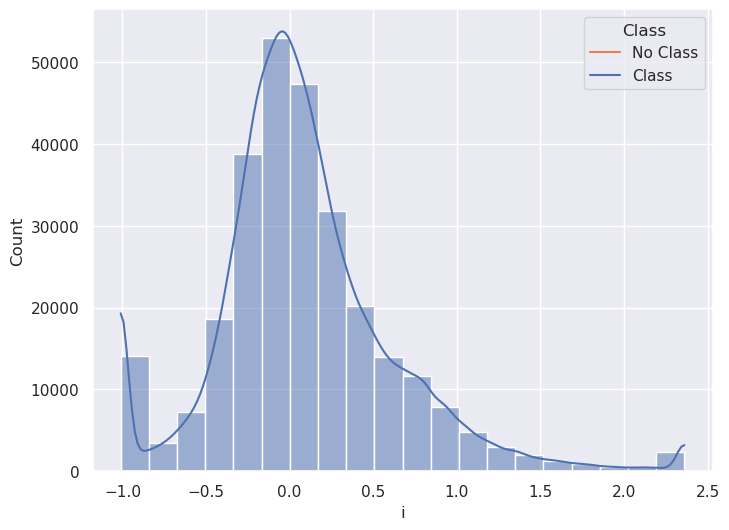

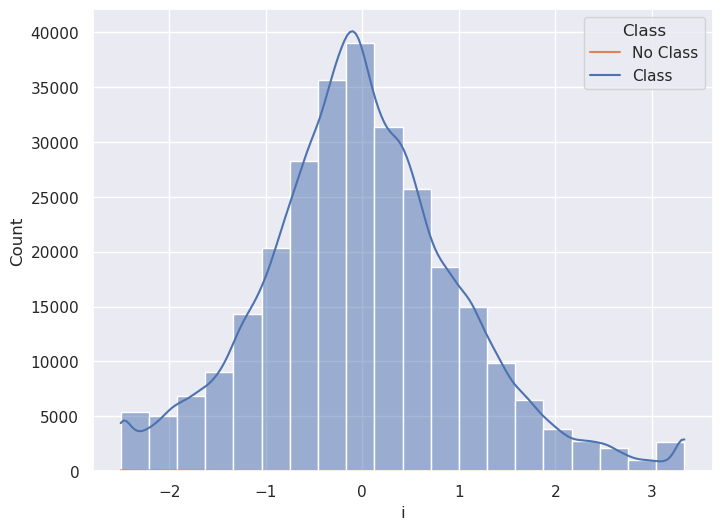

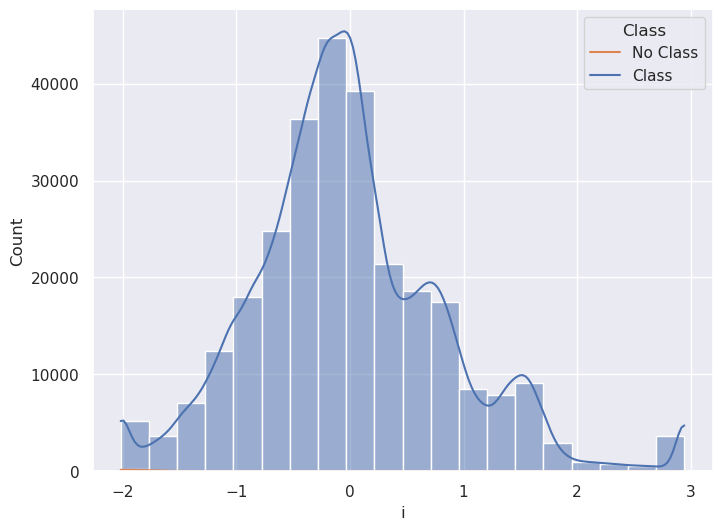

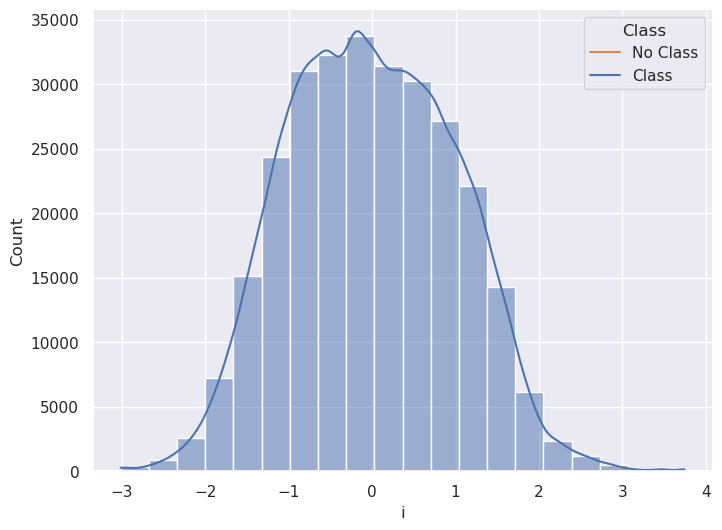

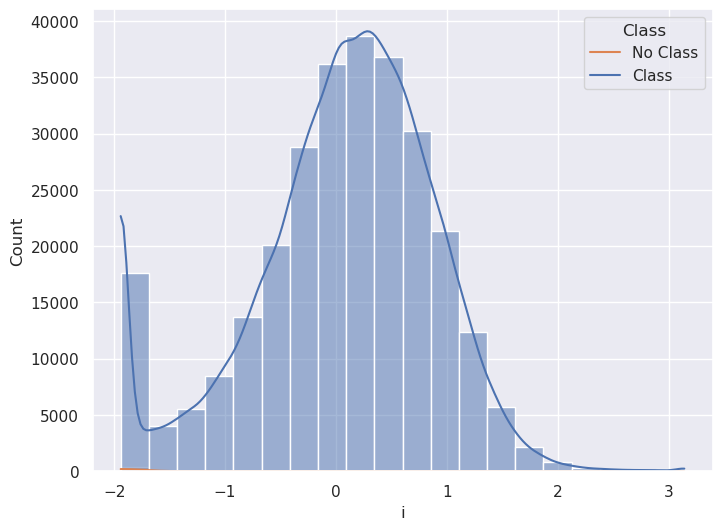

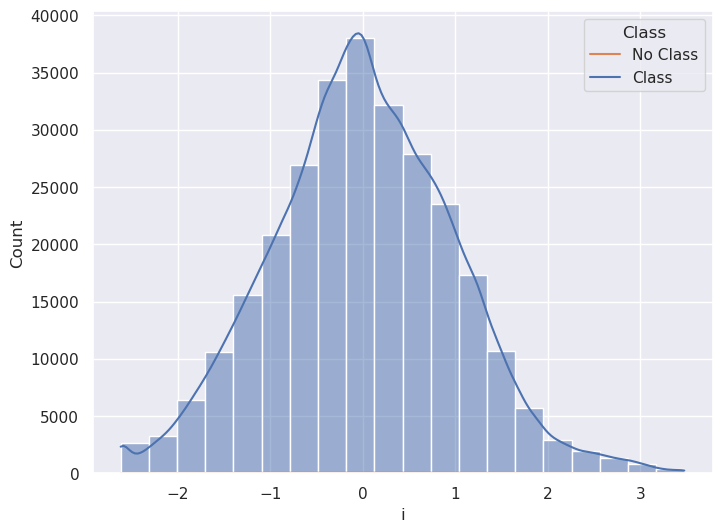

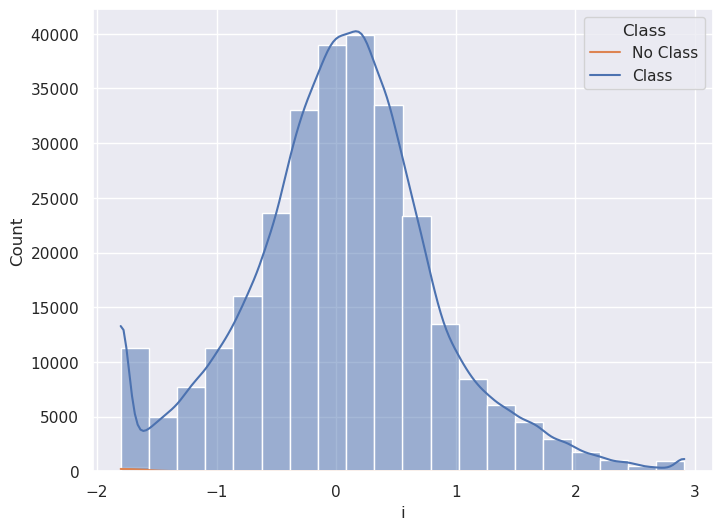

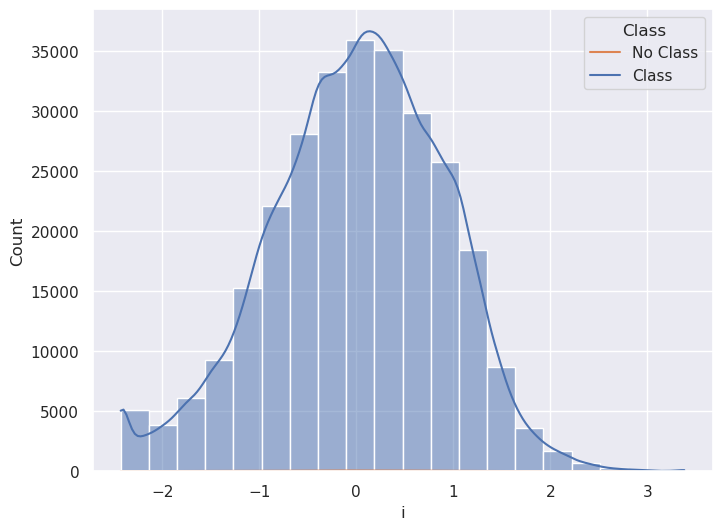

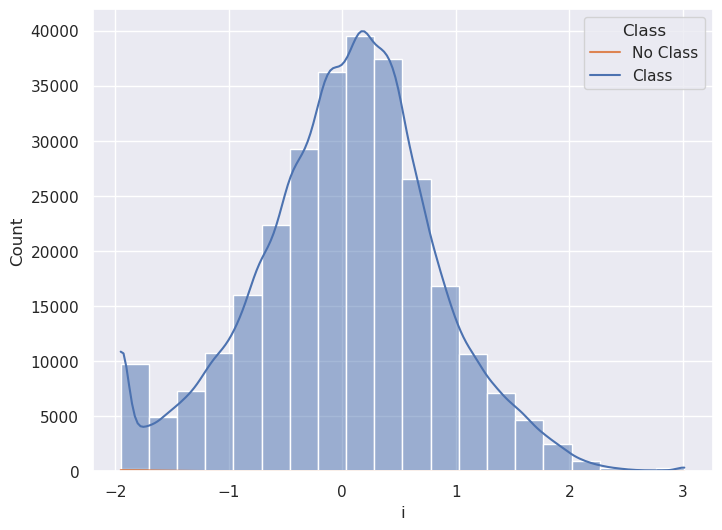

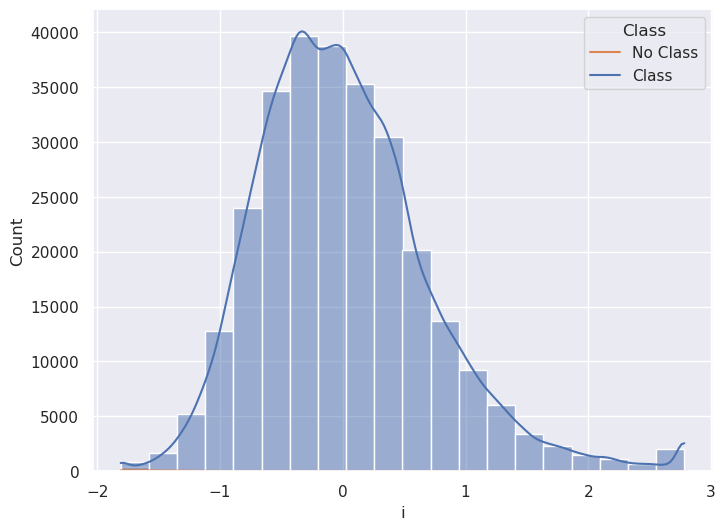

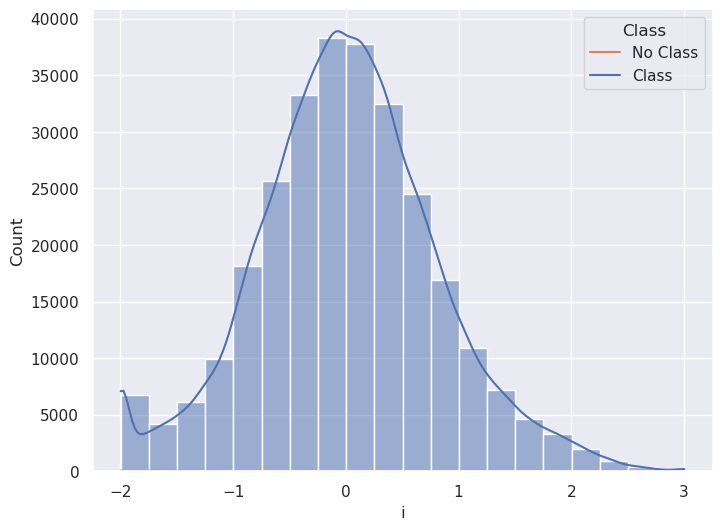

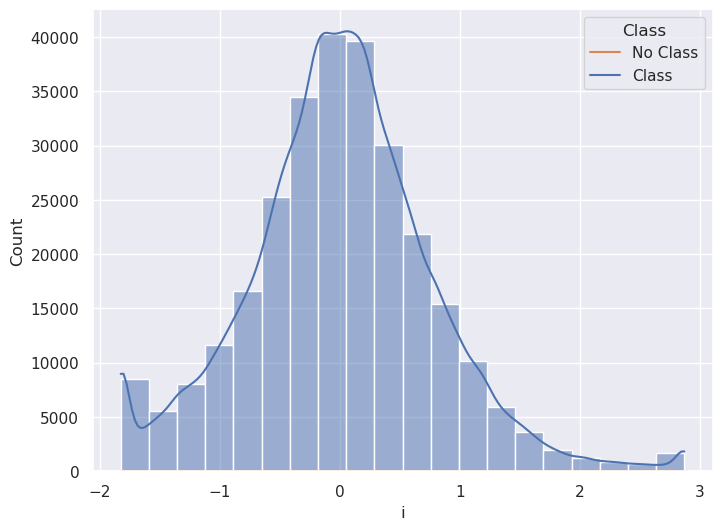

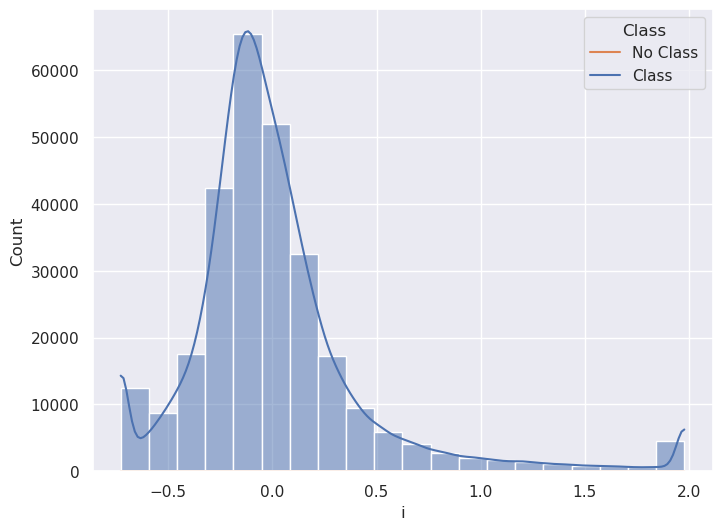

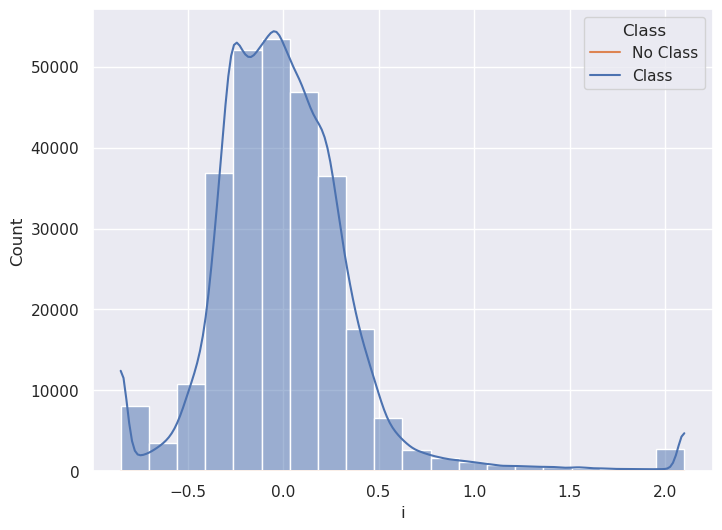

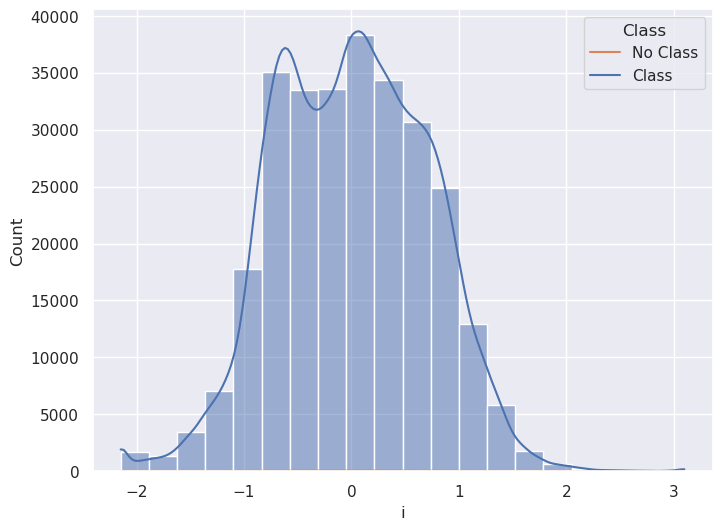

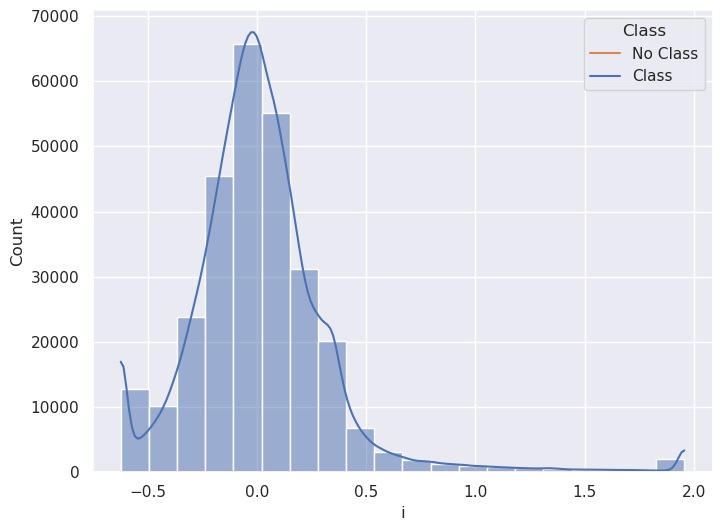

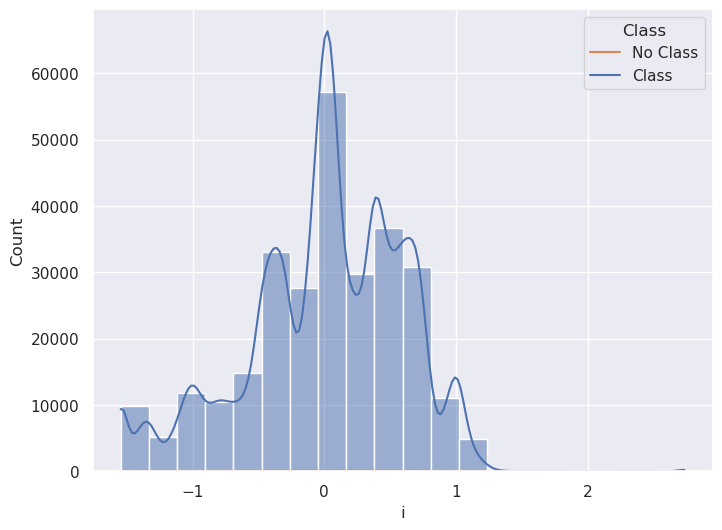

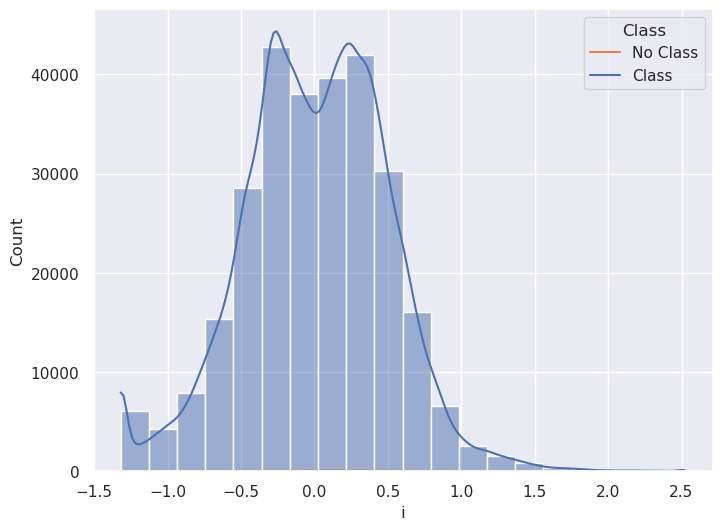

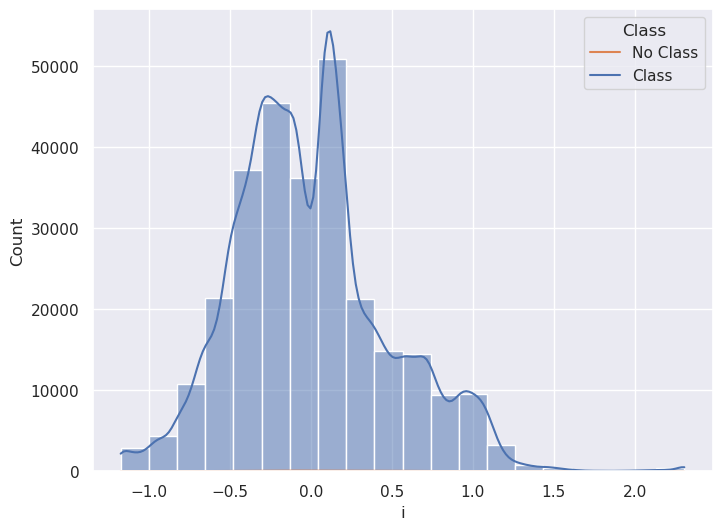

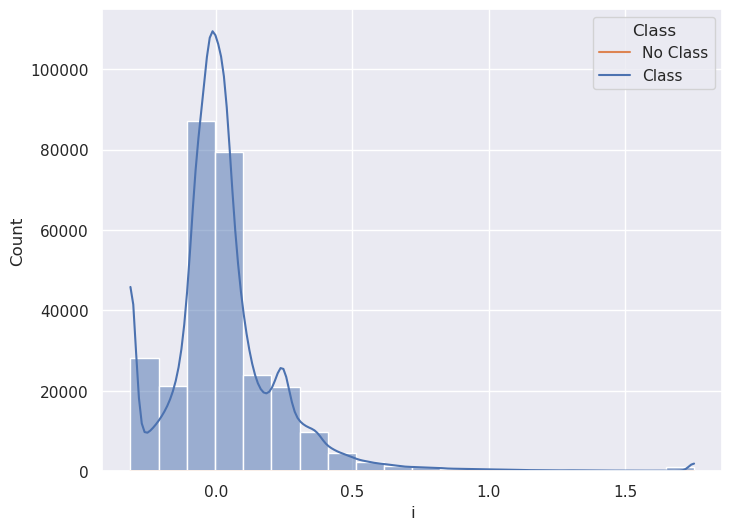

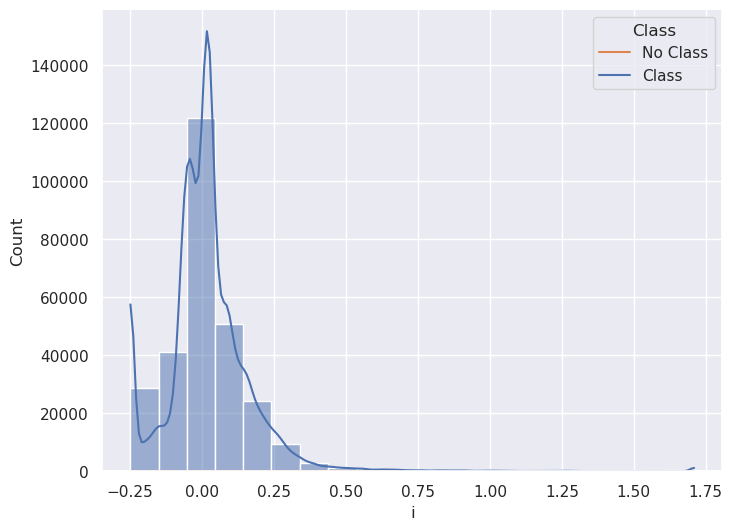

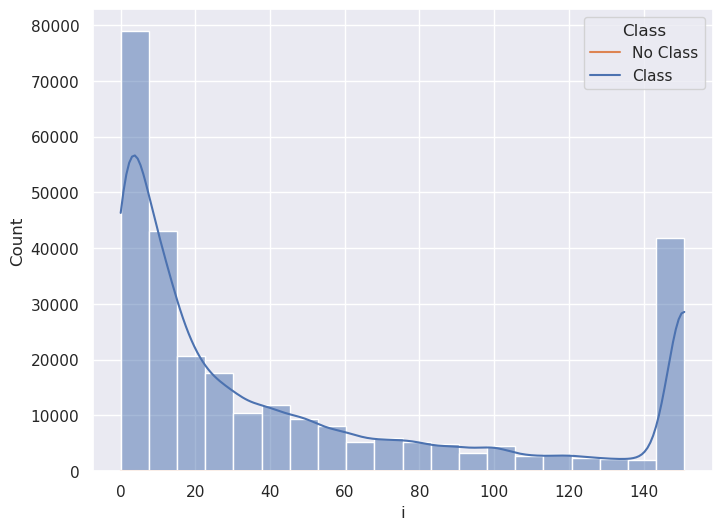

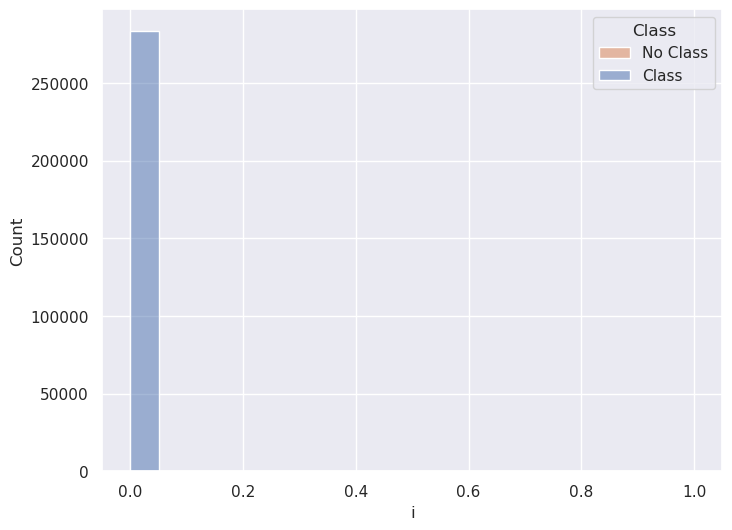

In [36]:
for i in df.columns:
    plt.figure(figsize = (8, 6))
    sns.histplot(data=df, x = i, hue='Class', kde = True, bins=20)
    plt.xlabel('i')
    plt.ylabel('Count')
    plt.legend(title = 'Class', loc = 'upper right', labels = ['No Class', 'Class'])
    plt.show()

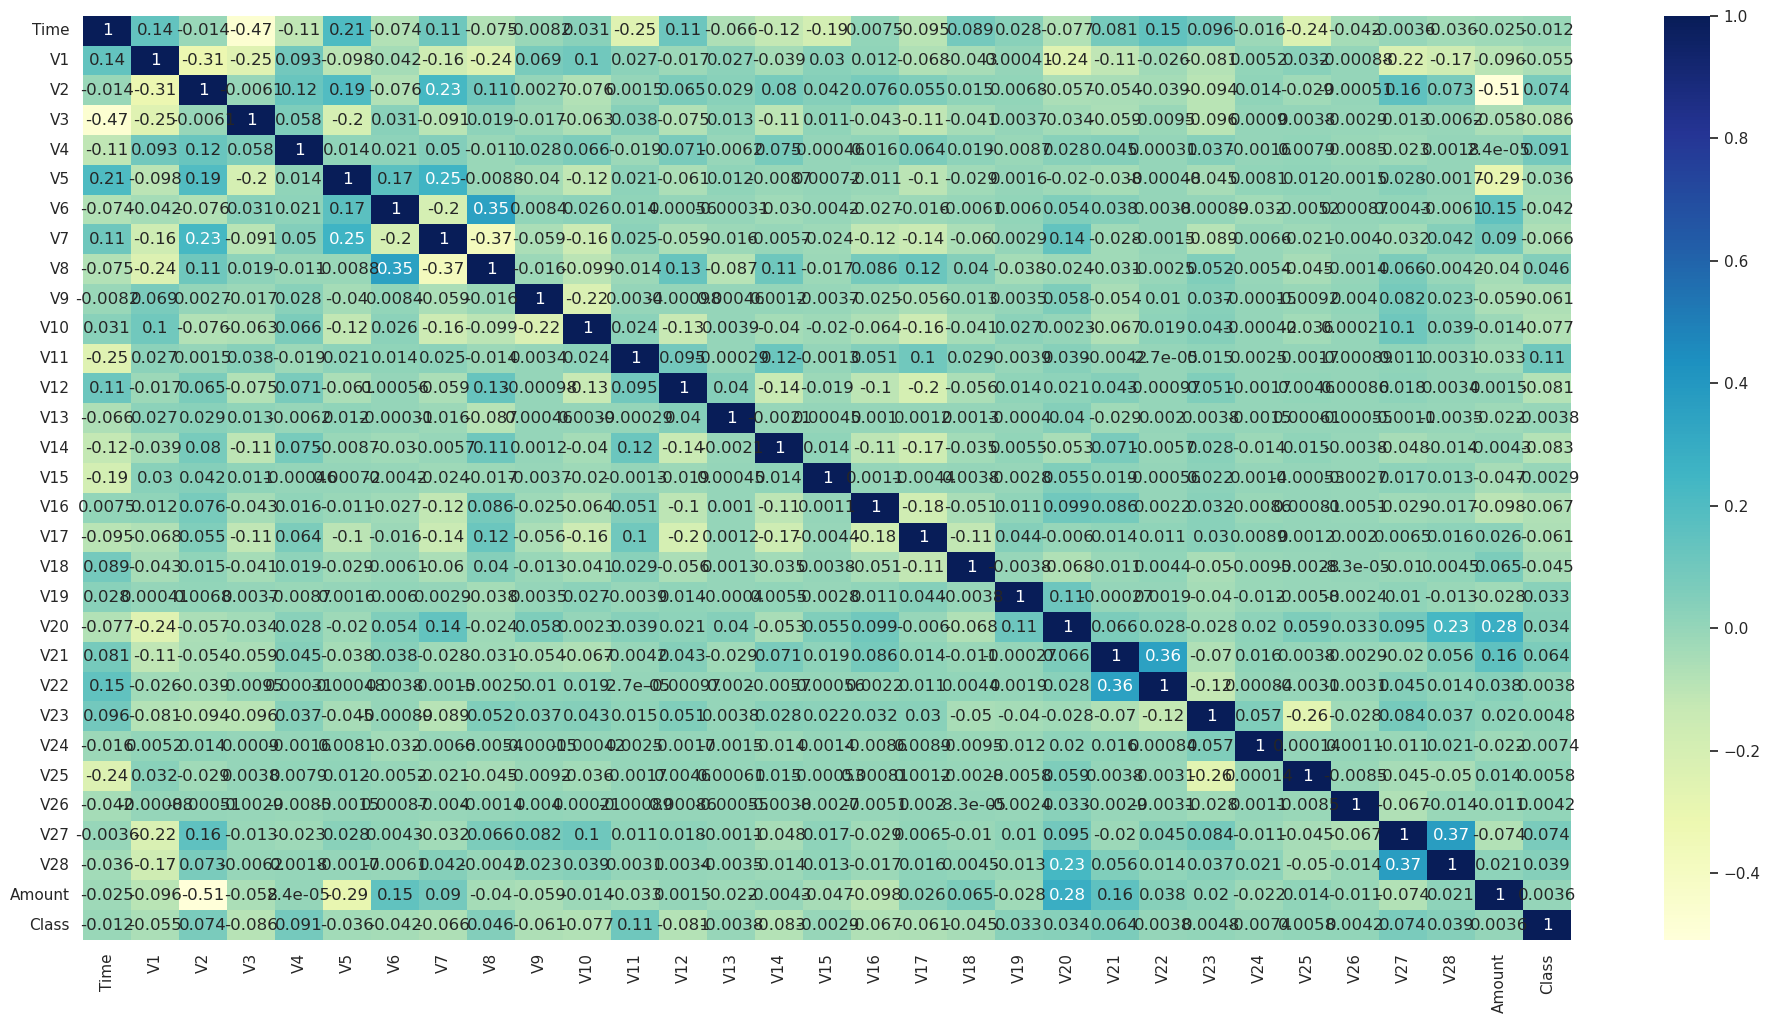

In [37]:
plt.figure(figsize=(24,12))
sns.heatmap(df.corr(), cmap='YlGnBu', annot=True)
plt.show()

In [38]:
# sns.pairplot(df,hue ='Class')
# plt.show()

/tmp/ipykernel_15419/2955997889.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[variable], kde =True,bins =10)


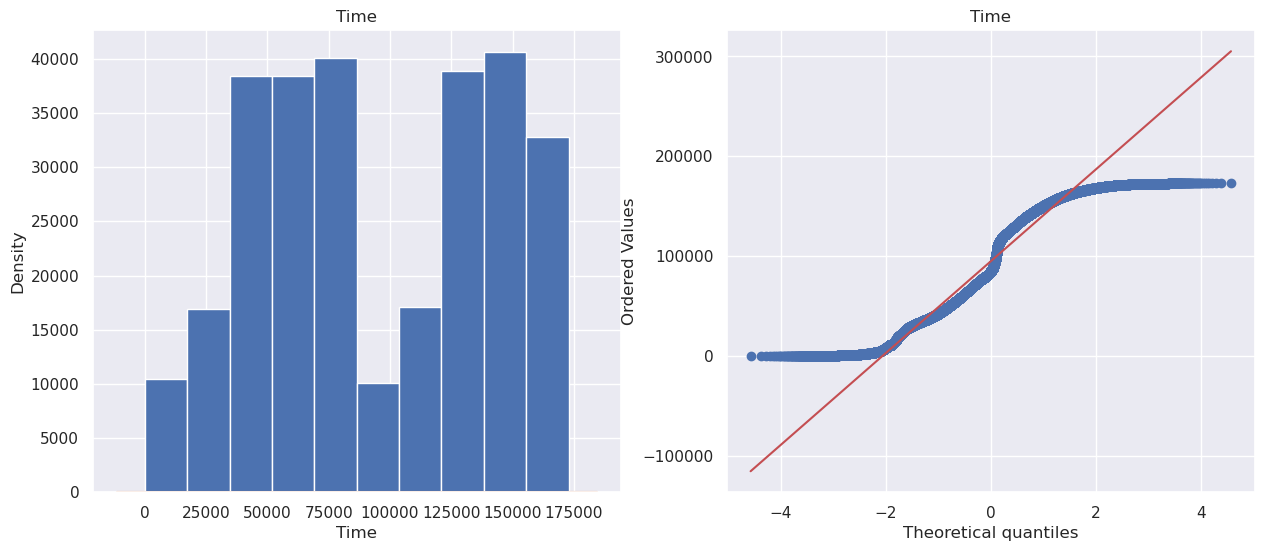

/tmp/ipykernel_15419/2955997889.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[variable], kde =True,bins =10)


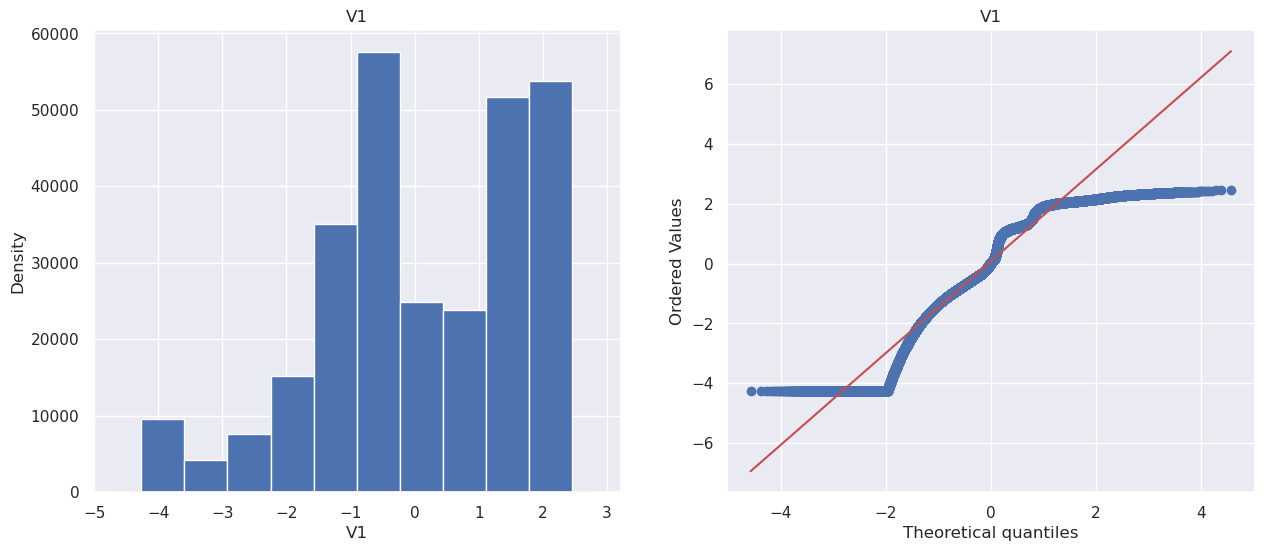

/tmp/ipykernel_15419/2955997889.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[variable], kde =True,bins =10)


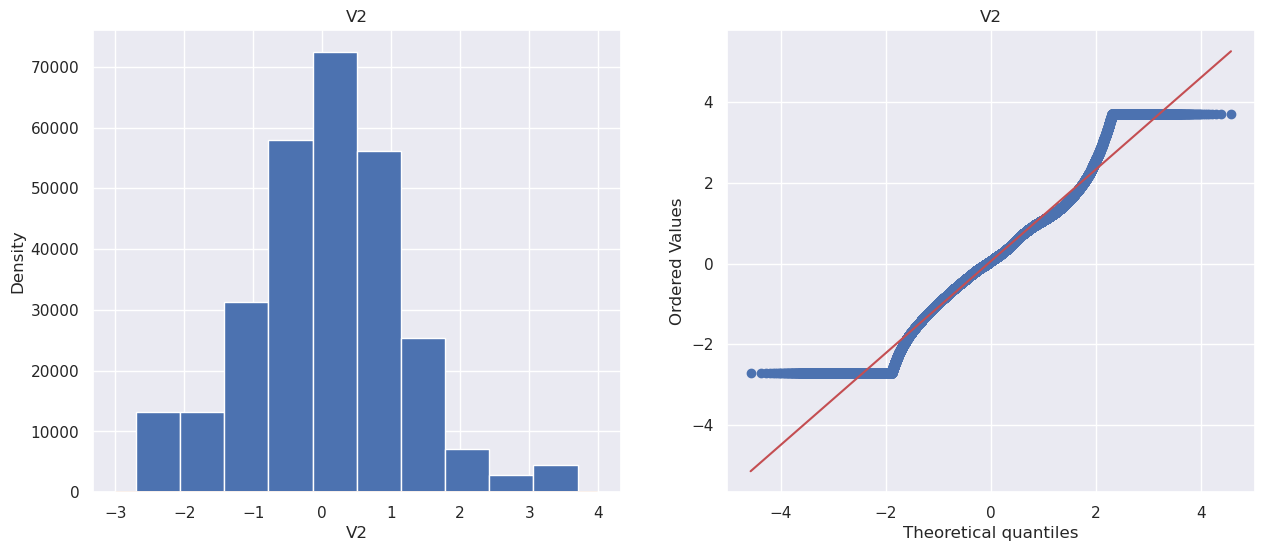

/tmp/ipykernel_15419/2955997889.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[variable], kde =True,bins =10)


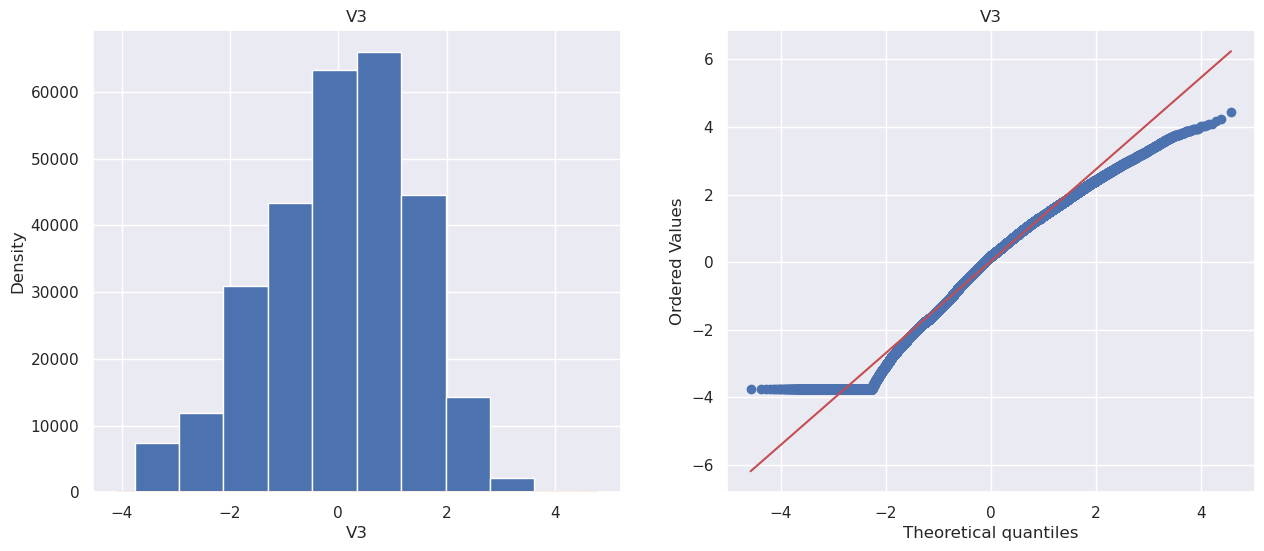

/tmp/ipykernel_15419/2955997889.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[variable], kde =True,bins =10)


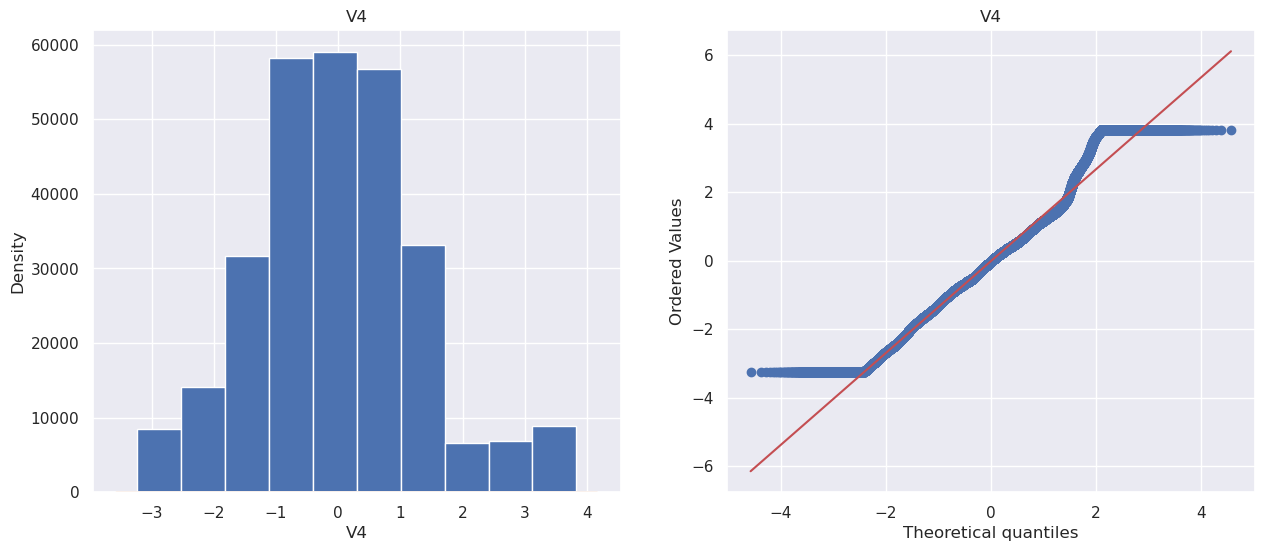

/tmp/ipykernel_15419/2955997889.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[variable], kde =True,bins =10)


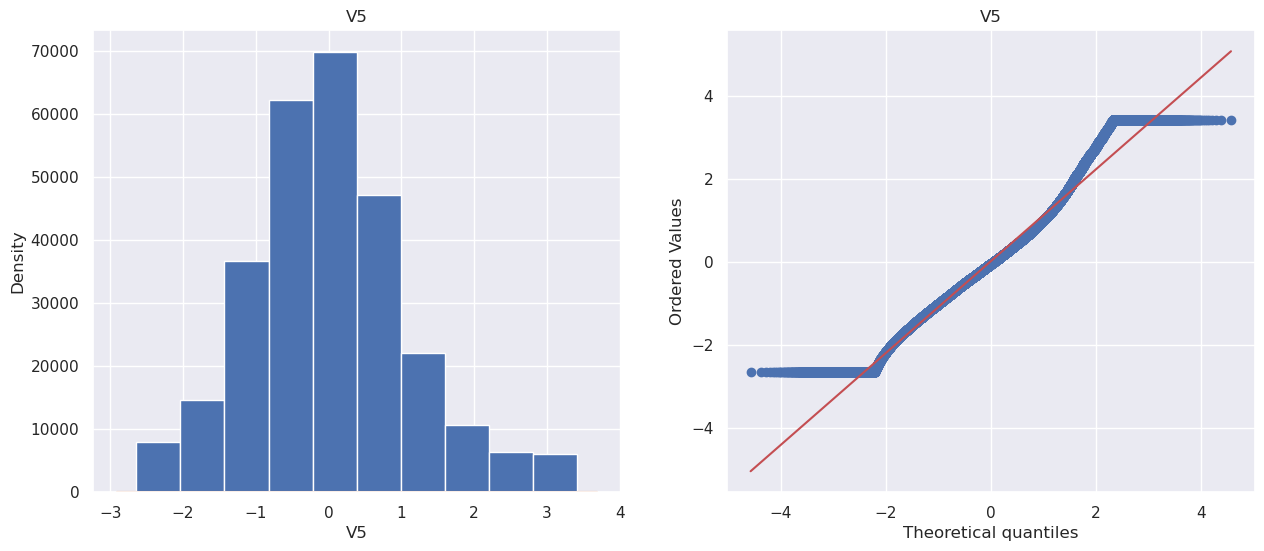

/tmp/ipykernel_15419/2955997889.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[variable], kde =True,bins =10)


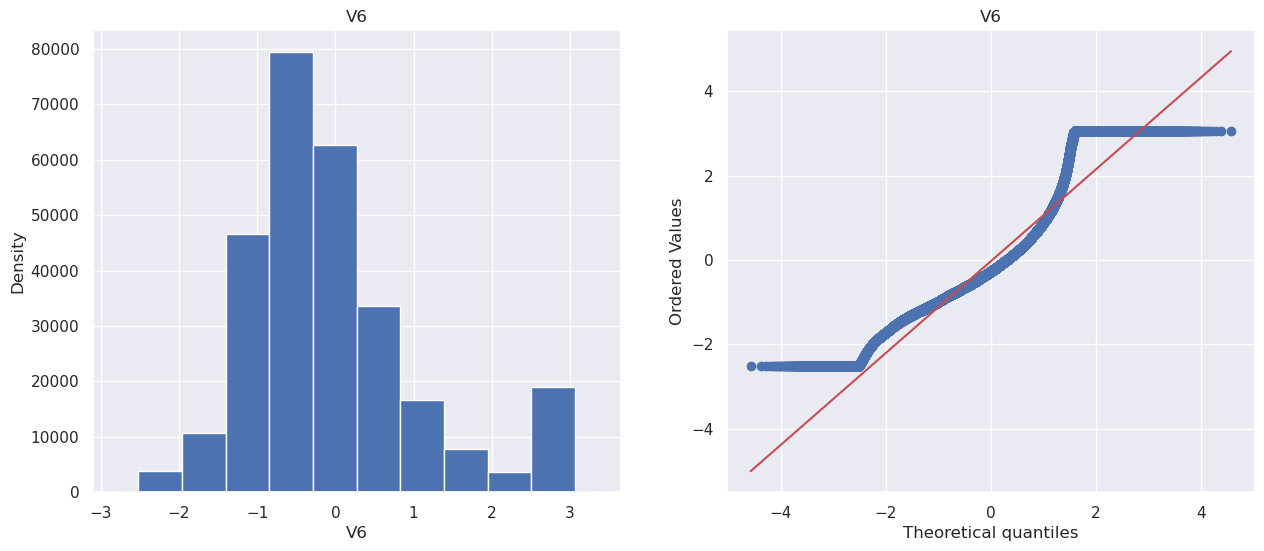

/tmp/ipykernel_15419/2955997889.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[variable], kde =True,bins =10)


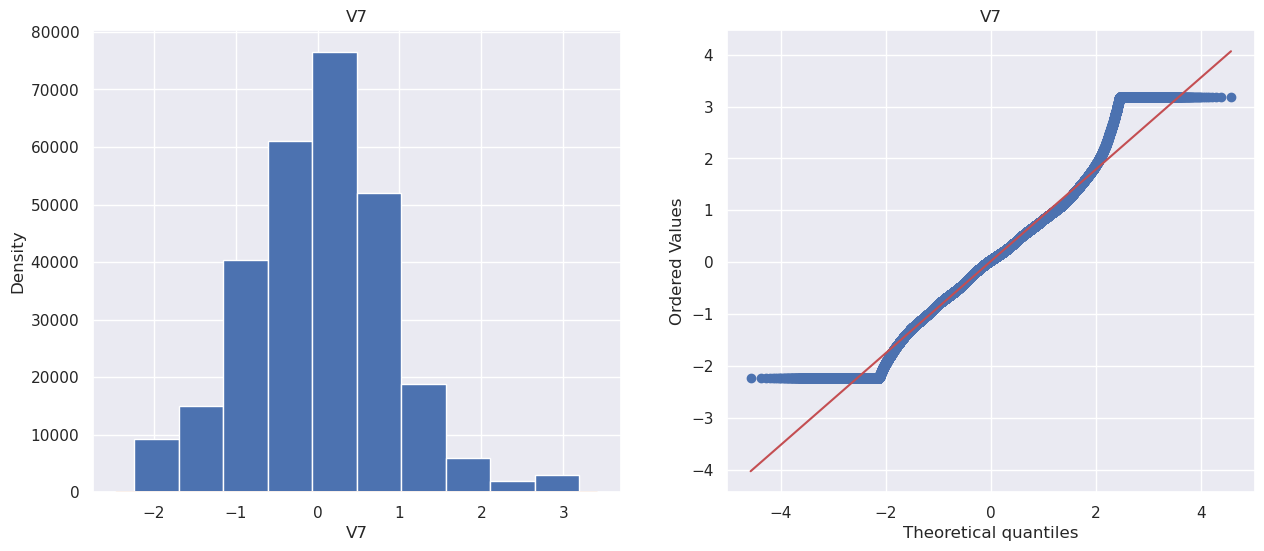

/tmp/ipykernel_15419/2955997889.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[variable], kde =True,bins =10)


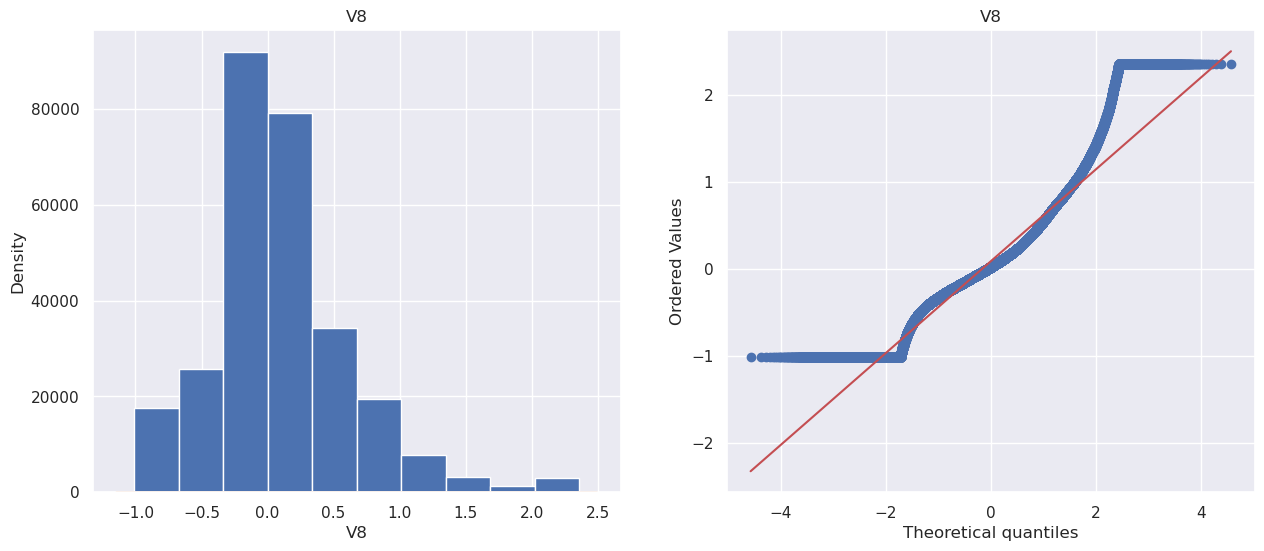

/tmp/ipykernel_15419/2955997889.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[variable], kde =True,bins =10)


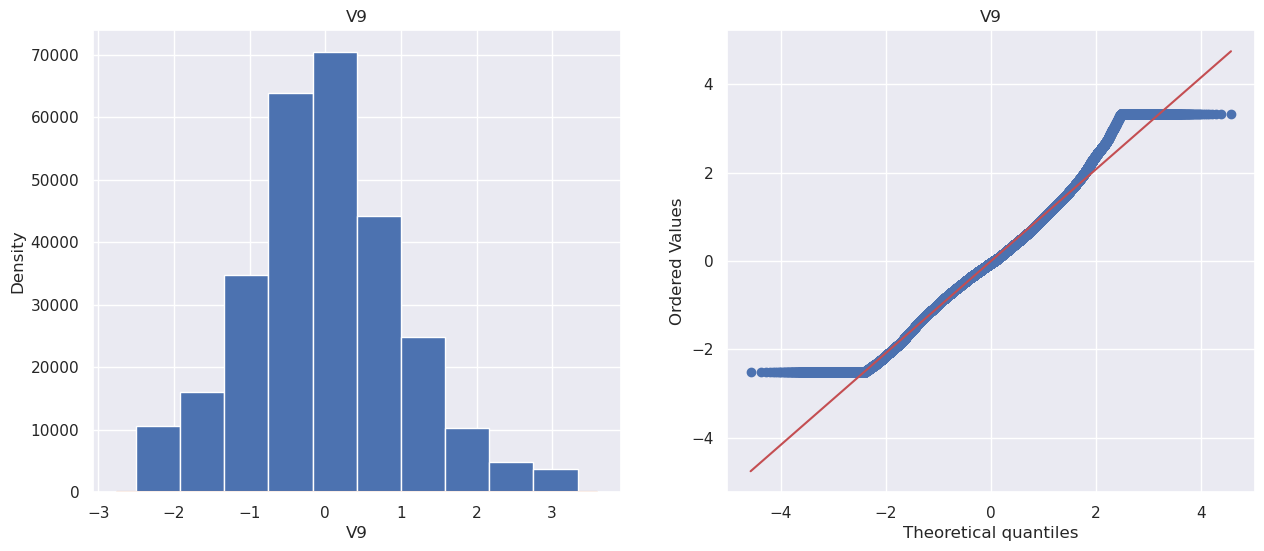

/tmp/ipykernel_15419/2955997889.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[variable], kde =True,bins =10)


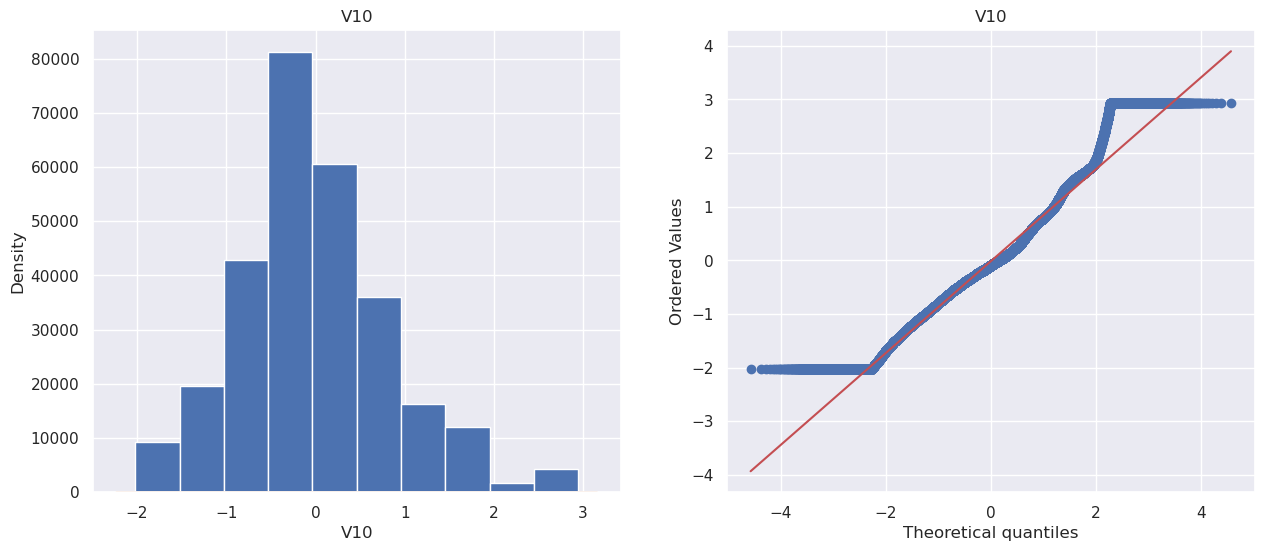

/tmp/ipykernel_15419/2955997889.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[variable], kde =True,bins =10)


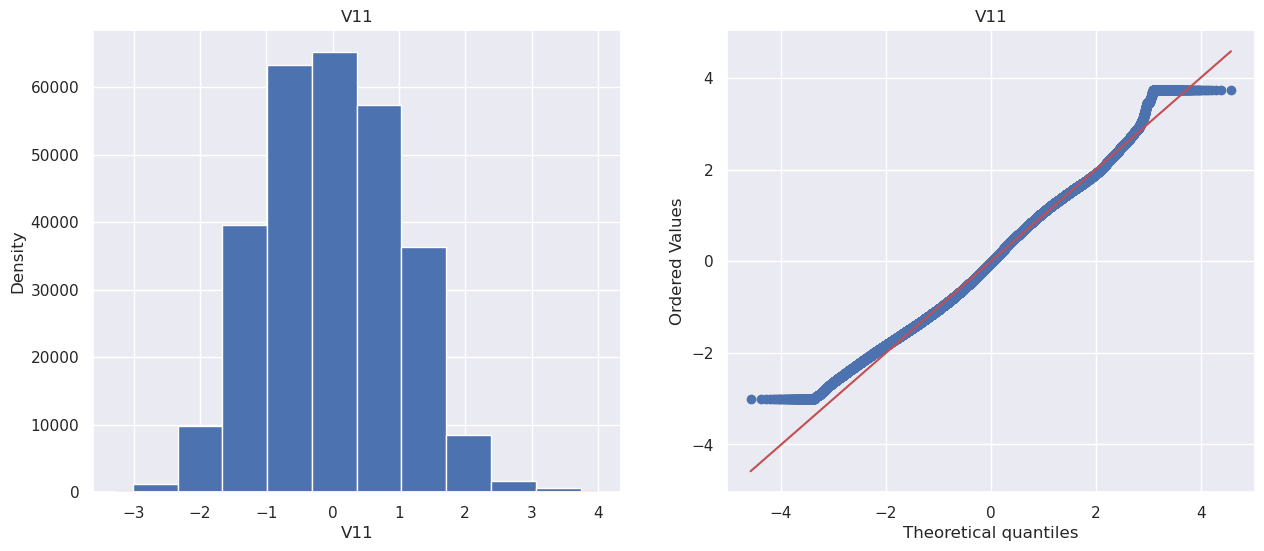

/tmp/ipykernel_15419/2955997889.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[variable], kde =True,bins =10)


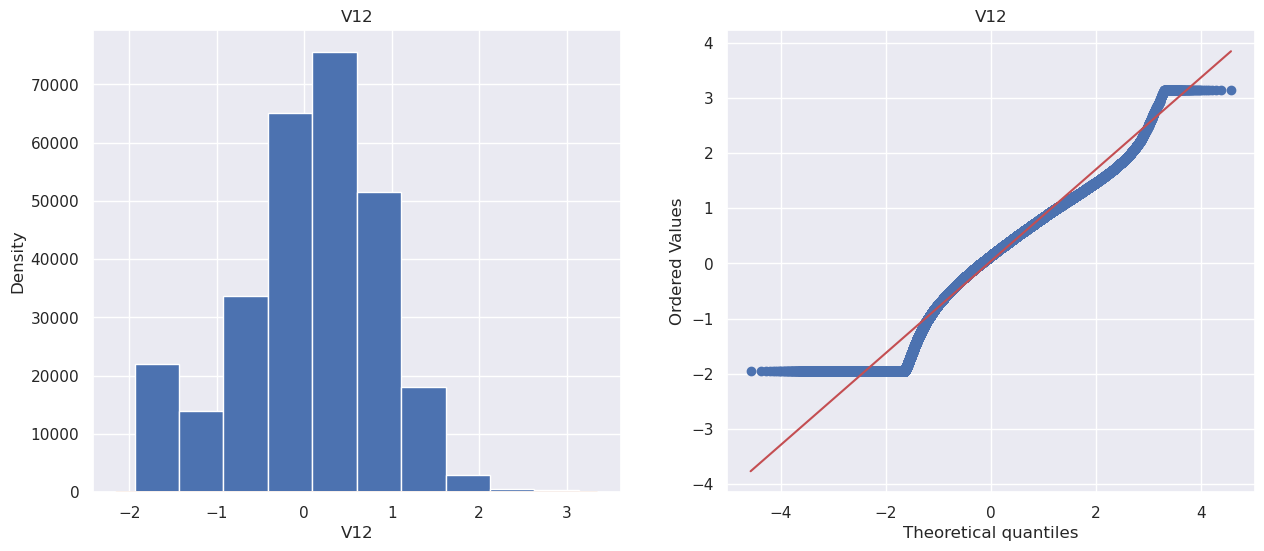

/tmp/ipykernel_15419/2955997889.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[variable], kde =True,bins =10)


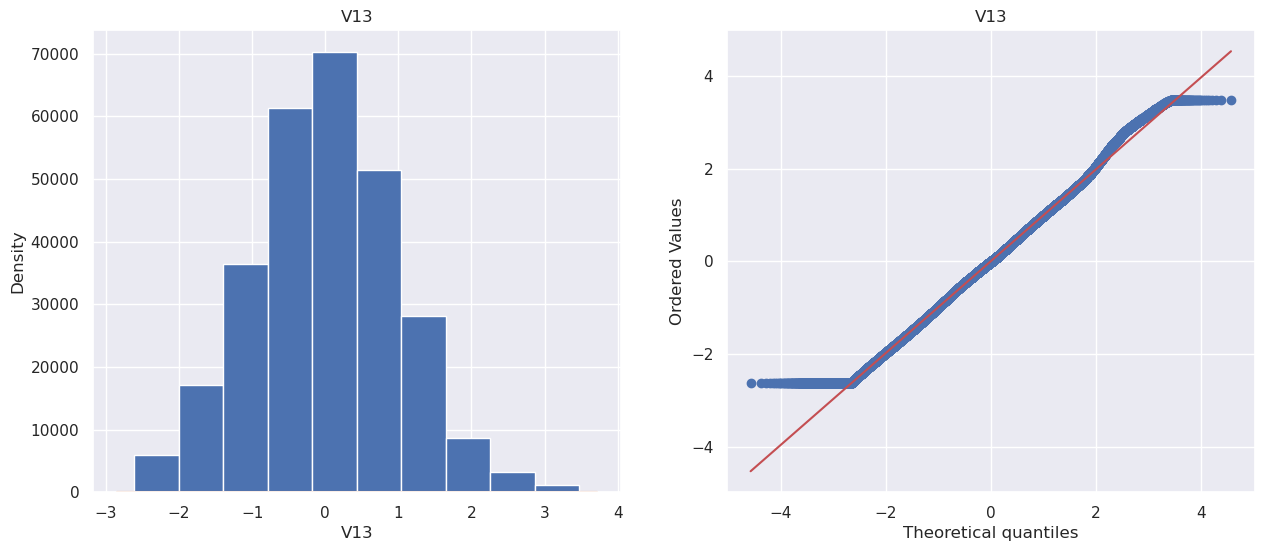

/tmp/ipykernel_15419/2955997889.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[variable], kde =True,bins =10)


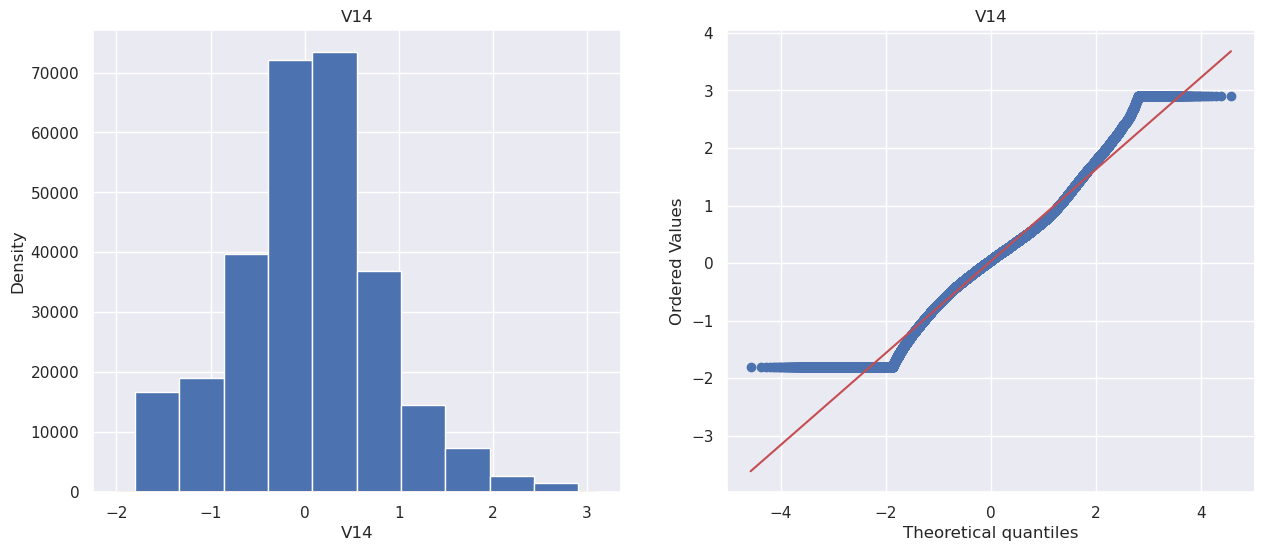

/tmp/ipykernel_15419/2955997889.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[variable], kde =True,bins =10)


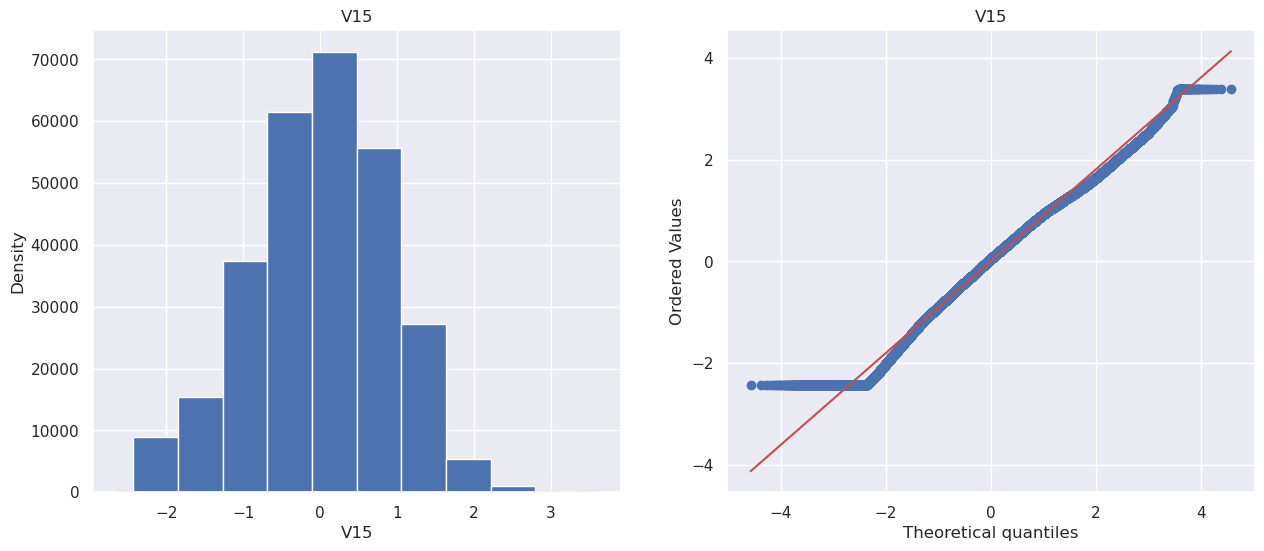

/tmp/ipykernel_15419/2955997889.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[variable], kde =True,bins =10)


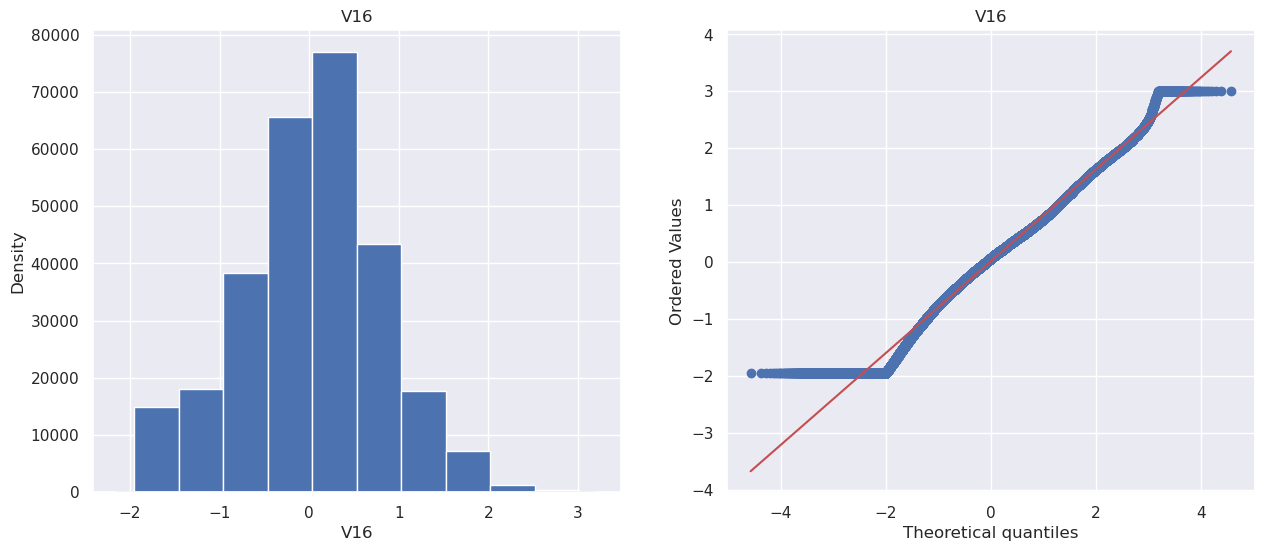

/tmp/ipykernel_15419/2955997889.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[variable], kde =True,bins =10)


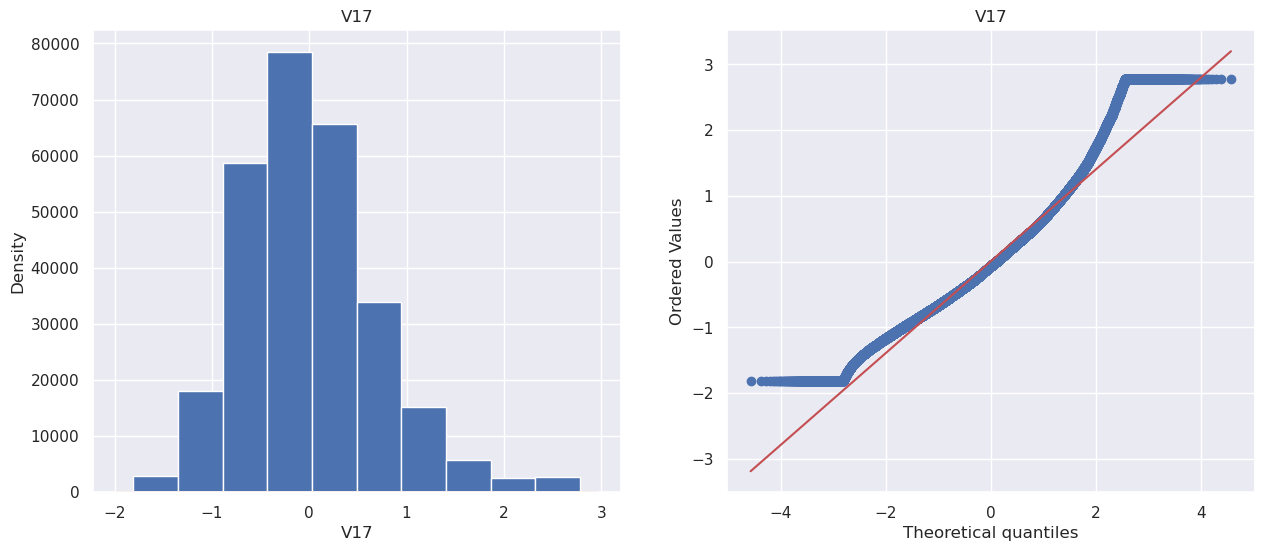

/tmp/ipykernel_15419/2955997889.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[variable], kde =True,bins =10)


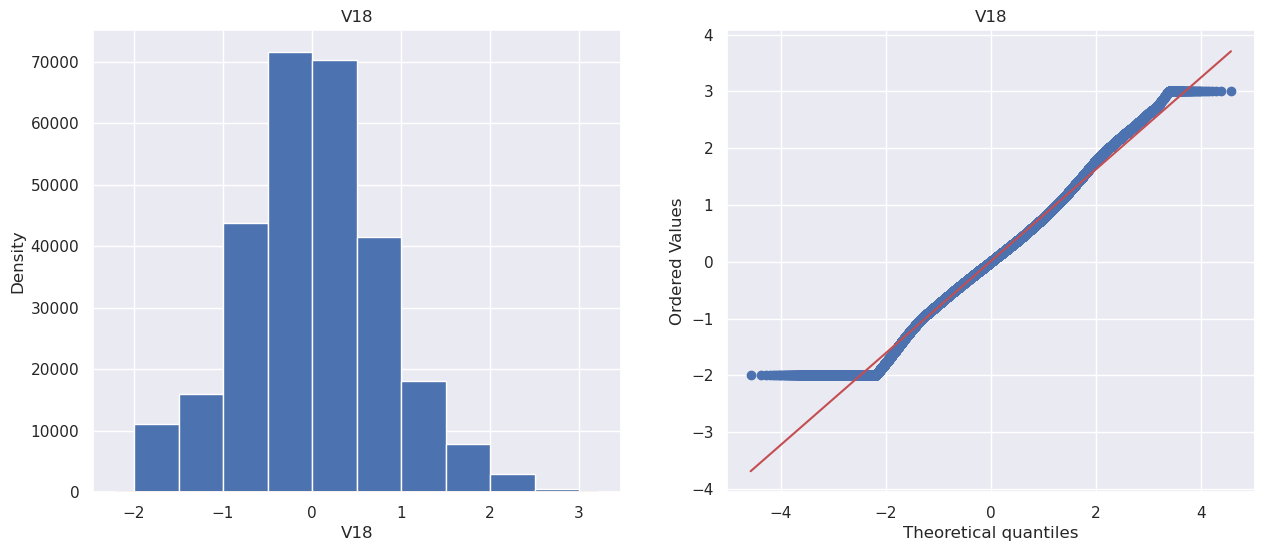

/tmp/ipykernel_15419/2955997889.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[variable], kde =True,bins =10)


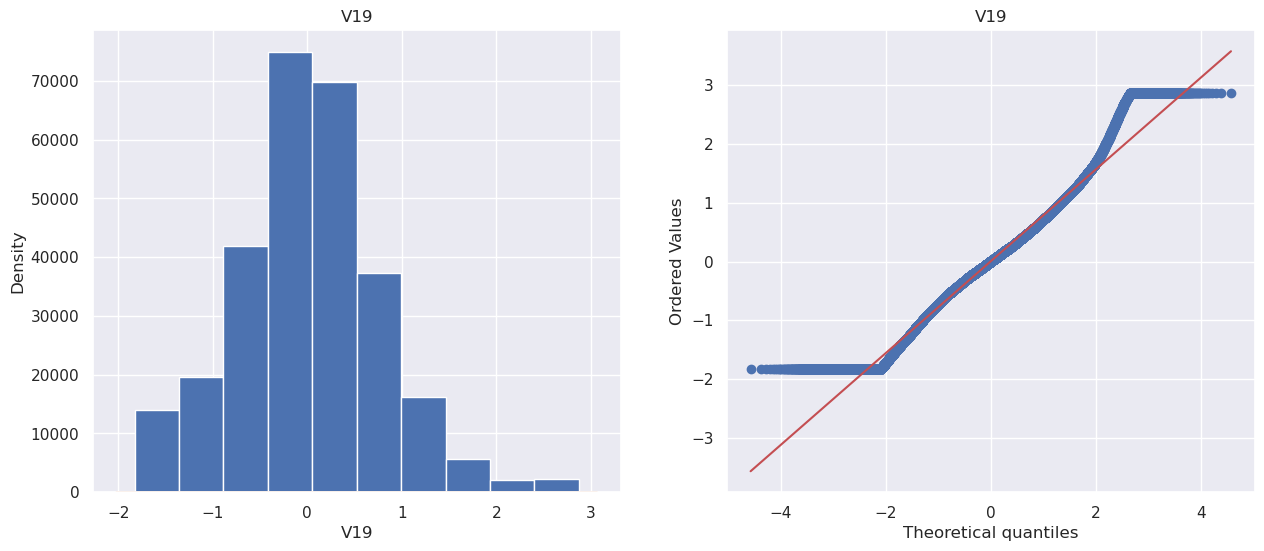

/tmp/ipykernel_15419/2955997889.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[variable], kde =True,bins =10)


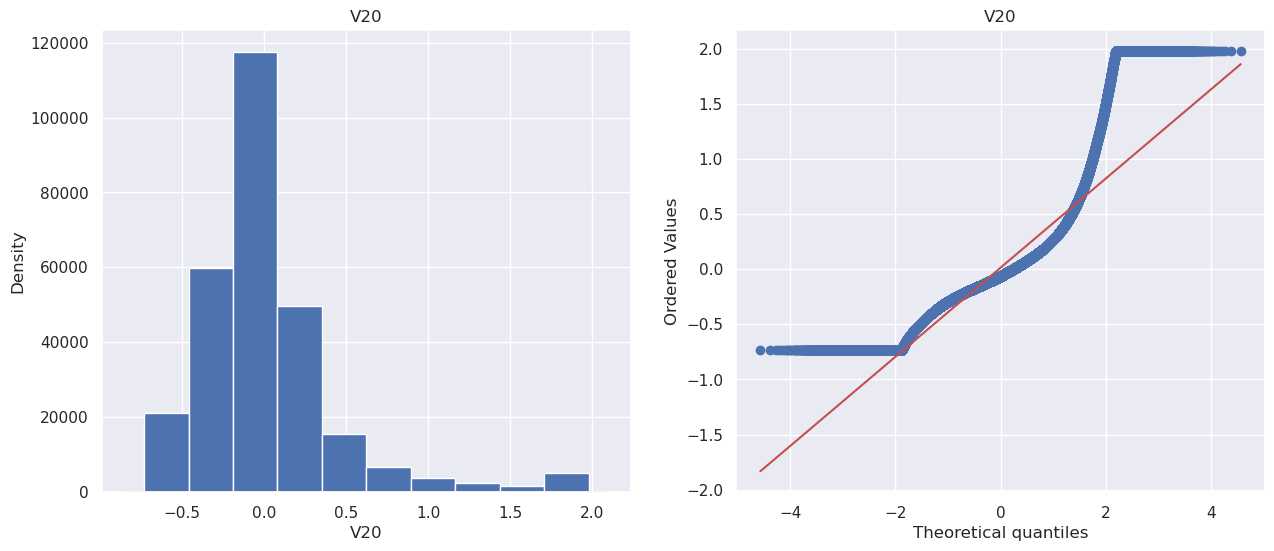

/tmp/ipykernel_15419/2955997889.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[variable], kde =True,bins =10)


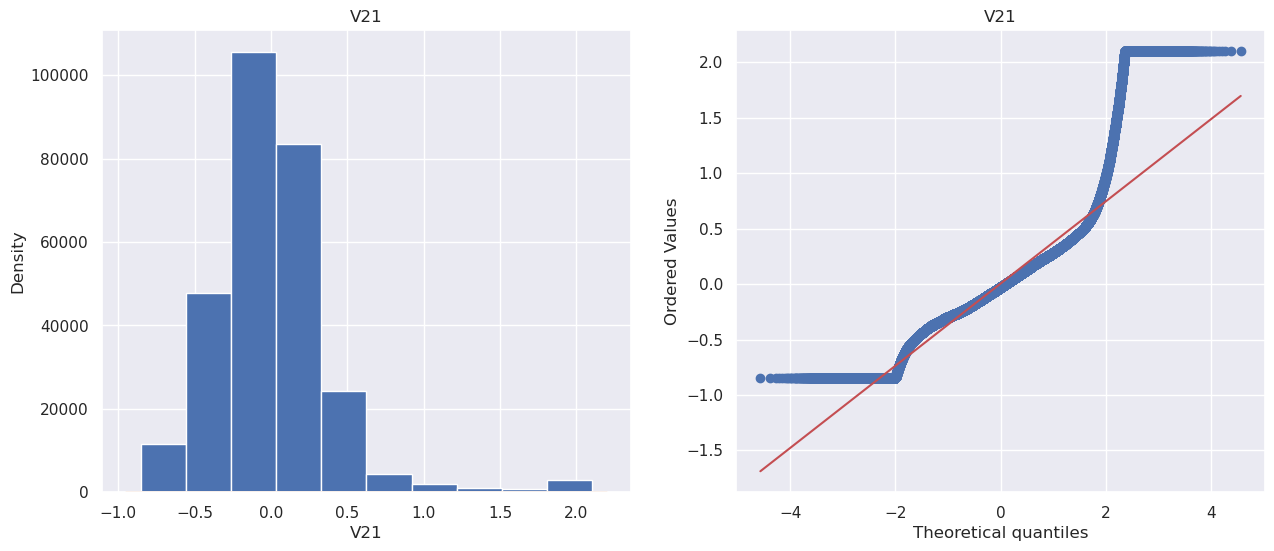

/tmp/ipykernel_15419/2955997889.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[variable], kde =True,bins =10)


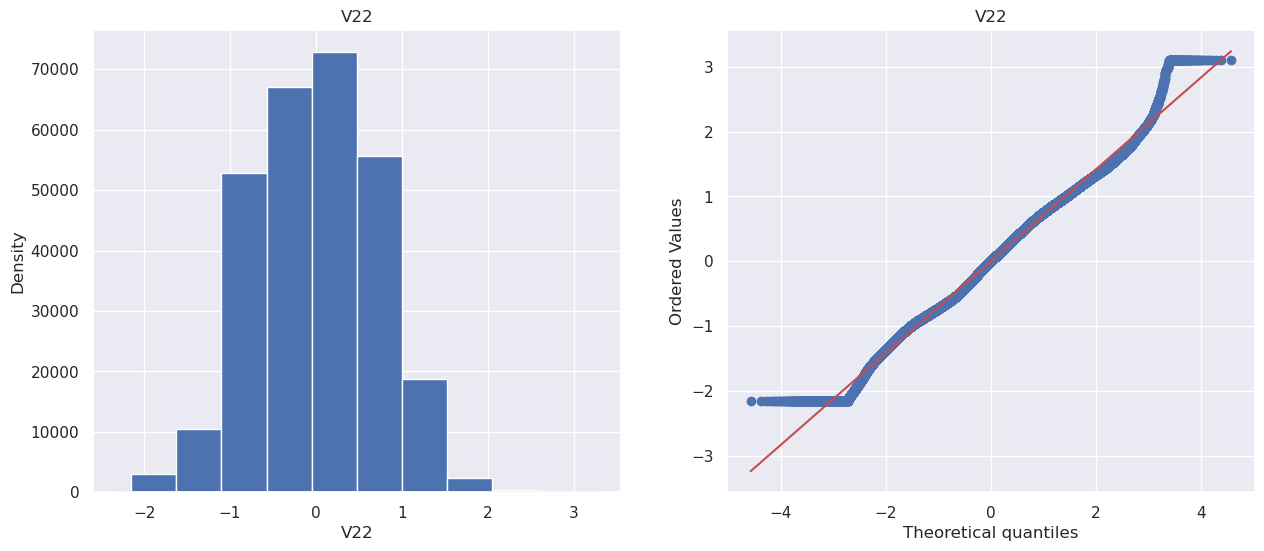

/tmp/ipykernel_15419/2955997889.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[variable], kde =True,bins =10)


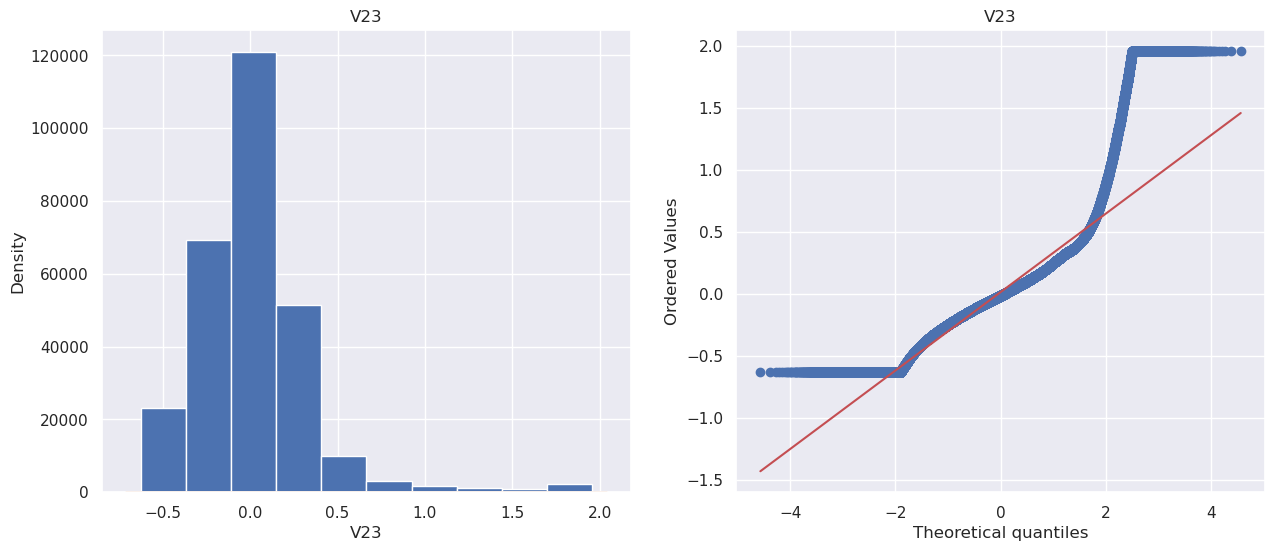

/tmp/ipykernel_15419/2955997889.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[variable], kde =True,bins =10)


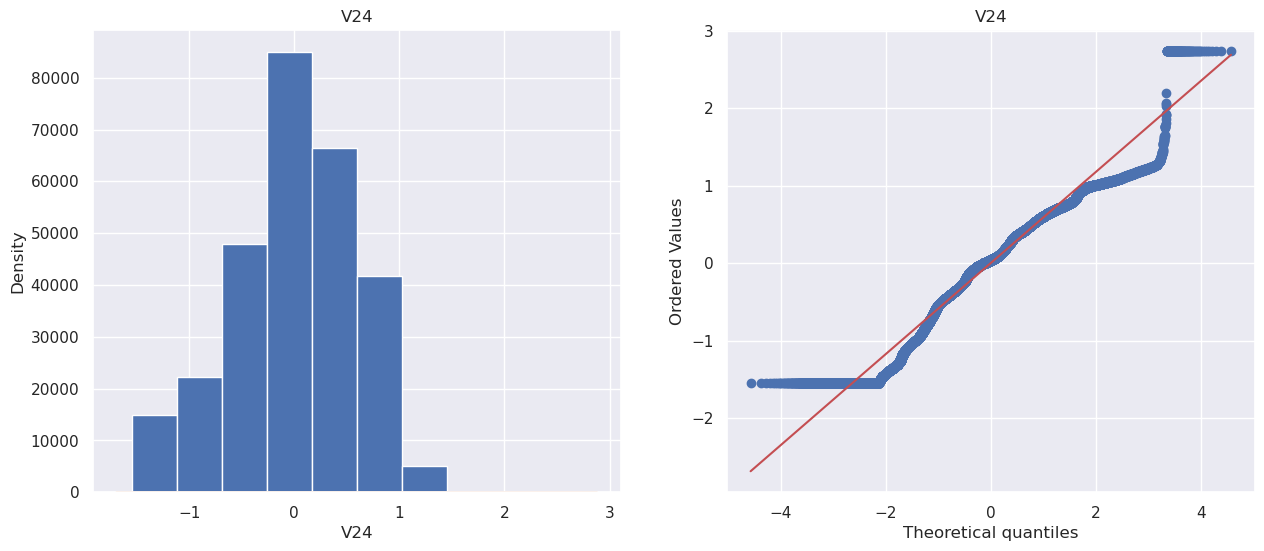

/tmp/ipykernel_15419/2955997889.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[variable], kde =True,bins =10)


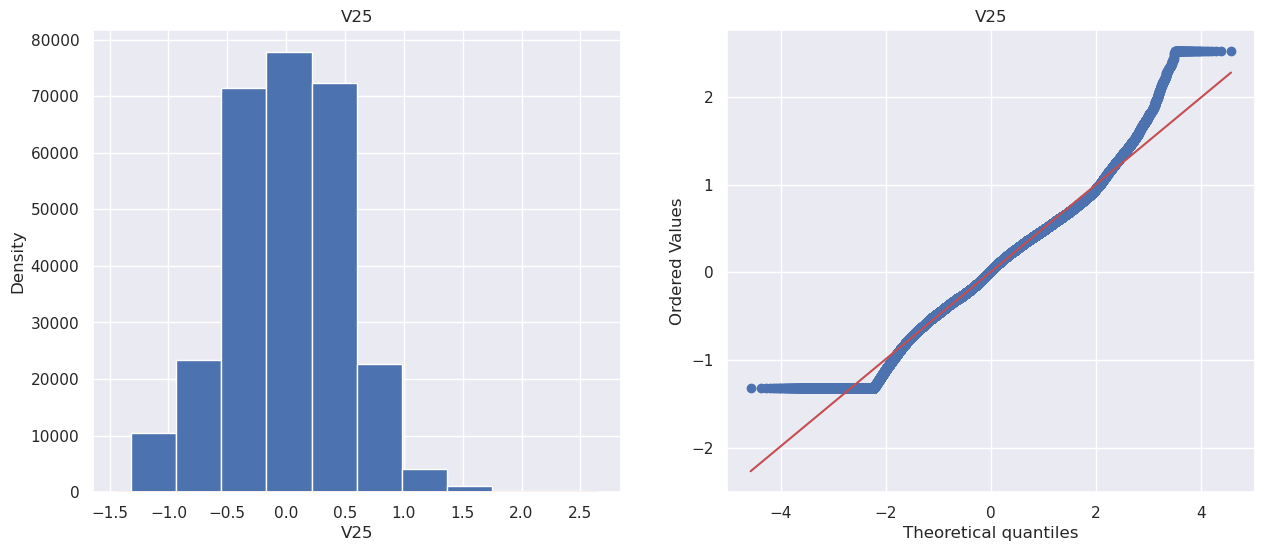

/tmp/ipykernel_15419/2955997889.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[variable], kde =True,bins =10)


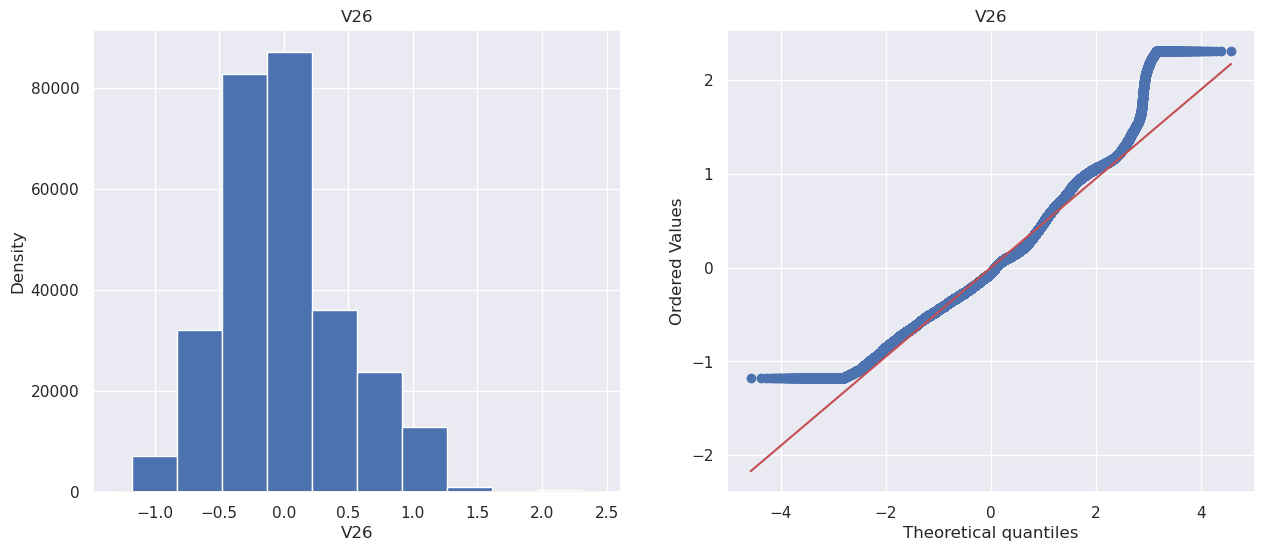

/tmp/ipykernel_15419/2955997889.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[variable], kde =True,bins =10)


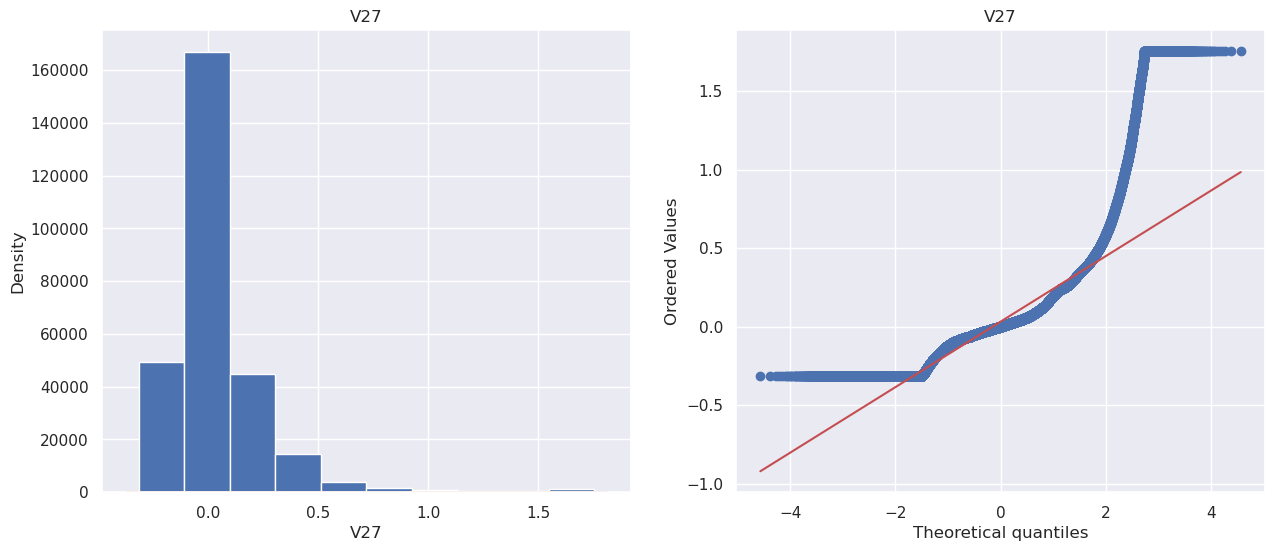

/tmp/ipykernel_15419/2955997889.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[variable], kde =True,bins =10)


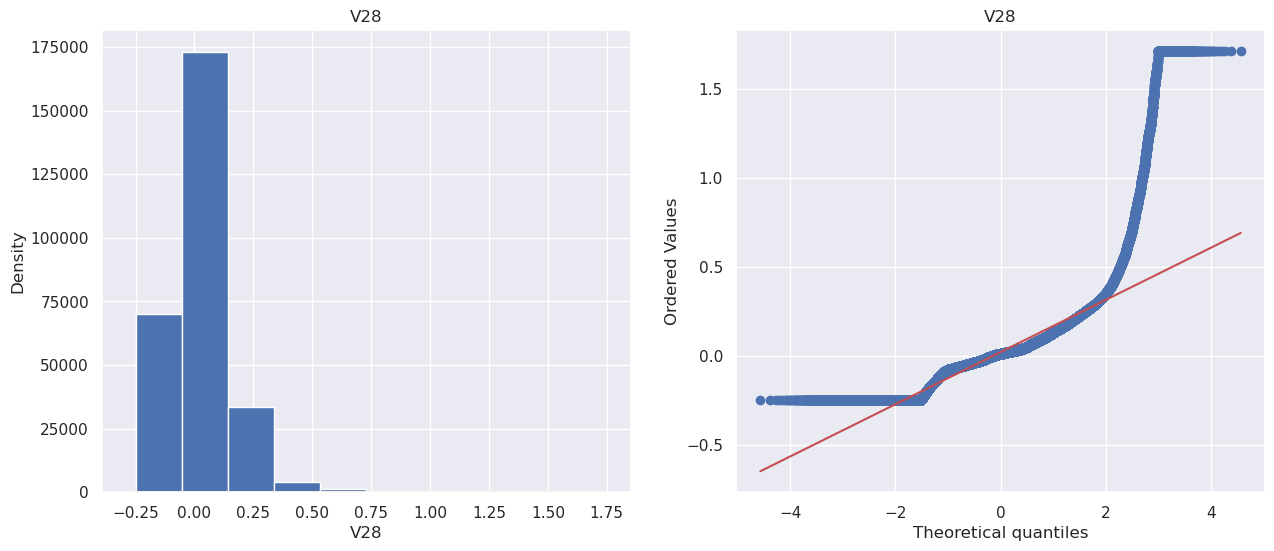

/tmp/ipykernel_15419/2955997889.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[variable], kde =True,bins =10)


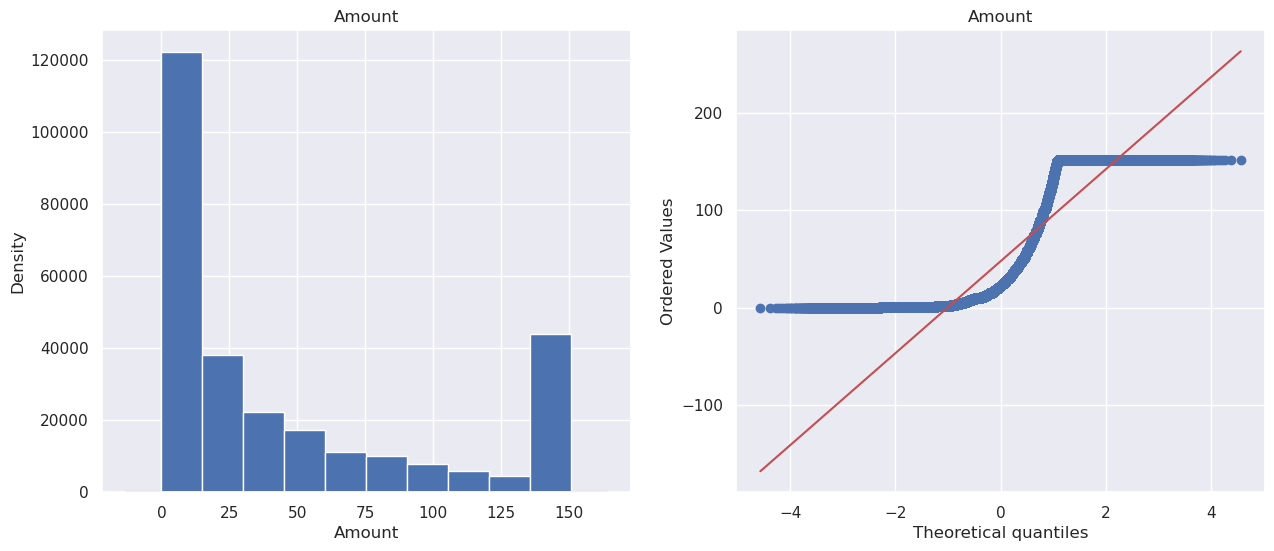

/tmp/ipykernel_15419/2955997889.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[variable], kde =True,bins =10)


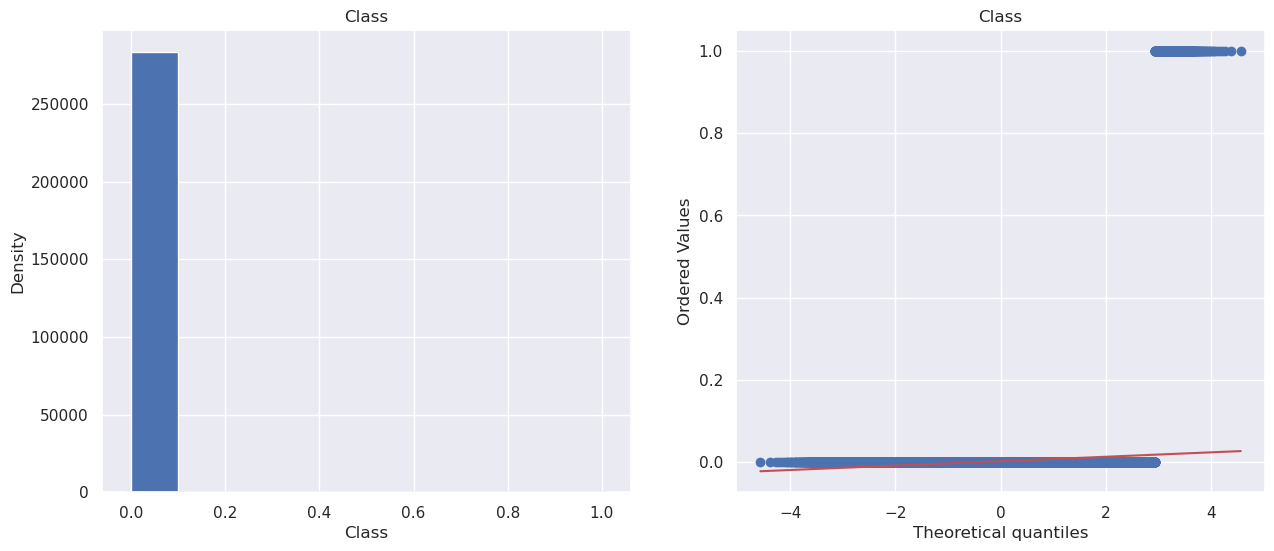

In [39]:
def plots(df, variable):
    plt.figure(figsize = (15, 6))
    plt.subplot(1,2,1)
    df[variable].hist()
    sns.distplot(df[variable], kde =True,bins =10)
    plt.title(variable)
    plt.subplot(1, 2, 2)
    stats.probplot(df[variable],dist='norm', plot=pylab)
    plt.title(variable)
    plt.show()
for i in df.columns:
    plots(df, i)

In [40]:
X = df.iloc[:,1:30]
Y = df['Class']

In [41]:
X.head()

V1        V2        V3        V4        V5        V6        V7  \
0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9       V10  ...       V20       V21       V22       V23  \
0  0.098698  0.363787  0.090794  ...  0.251412 -0.018307  0.277838 -0.110474   
1  0.085102 -0.255425 -0.166974  ... -0.069083 -0.225775 -0.638672  0.101288   
2  0.247676 -1.514654  0.207643  ...  0.524980  0.247998  0.771679  0.909412   
3  0.377436 -1.387024 -0.054952  ... -0.208038 -0.108300  0.005274 -0.190321   
4 -0.270533  0.817739  0.753074  ...  0.408542 -0.009431  0.798278 -0.137458   

        V24       V25       V26       V27       V28  Amount  
0  0.066928  0.128539 -0.189115  0.133558 -0.021053  149.62  
1 -0.339846  0.167170  0.125895 -0.008983  0.014724    2.69  
2 -0.689281 -0.327642 -0.139097 -0.055353 -0.059752  150.92  
3 -1.175575  0.647376 -0.221929  0.062723  0.061458  123.50  
4  0.141267 -0.206010  0.502292  0.219422  0.215153   69.99  

[5 rows x 29 columns]

In [ ]:
mi_score = mutual_info_regression(X,Y)
mi_score = pd.Series(mi_score)
mi_score.index = X.columns 
mi_score.sort_values(ascending=True)  

<Axes: >

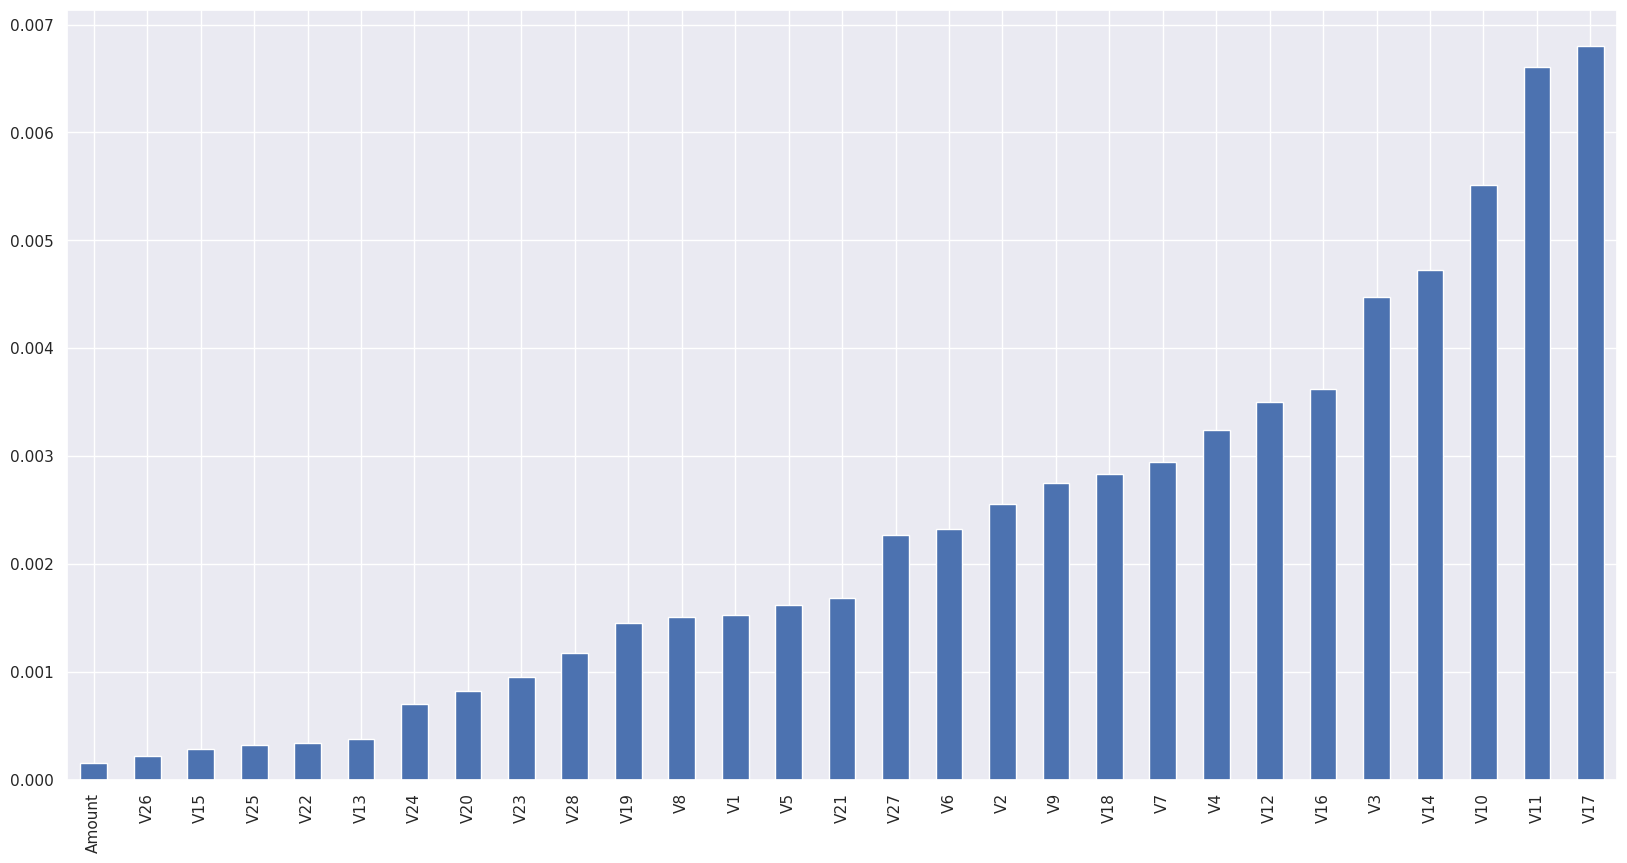

In [43]:
mi_score.sort_values(ascending=True).plot.bar(figsize=(20,10))

In [44]:
train_data, test_data,train_label,test_label = train_test_split(X,Y,test_size=0.3,random_state=0)

In [45]:
print("train_data :",train_data.shape)
print("train_label:",train_label.shape)
print("test_data:",test_data.shape)
print("test_label:",test_label.shape)

train_data : (198608, 29)
train_label: (198608,)
test_data: (85118, 29)
test_label: (85118,)


In [46]:
sc = StandardScaler()
train_data_sc = sc.fit_transform(train_data)
test_data_sc = sc.fit_transform(test_data)

In [47]:
train_data_sc

array([[ 1.17726986, -1.05296298, -0.36388957, ..., -0.29103308,
        -0.38511795,  1.2460863 ],
       [ 0.51809366, -0.7137034 , -0.41197119, ...,  0.02864806,
         0.22832405,  1.93983929],
       [ 1.2050965 ,  0.32143037, -1.70305678, ..., -0.18562103,
        -0.34184977, -0.87726388],
       ...,
       [-1.52662875, -1.52530947,  1.05593246, ..., -0.17541966,
        -1.65144197,  1.93983929],
       [ 1.22268713, -0.25669387, -0.79142325, ..., -0.38197776,
        -0.63881528, -0.83404524],
       [ 0.44770112, -0.91964659,  0.64455512, ..., -0.10245213,
        -0.10033047,  1.09651225]])

In [48]:
pc = PCA()
train_data_sc_pc = pc.fit_transform(train_data_sc)
test_data_sc_pc = pc.fit_transform(test_data_sc)

In [49]:
explained_variance = pc.explained_variance_ratio_
print("Explained Variance Ratios:", explained_variance)

Explained Variance Ratios: [0.06740276 0.06260626 0.05962673 0.05096671 0.0452184  0.04475286
 0.04305292 0.04285089 0.04157331 0.03962758 0.03885551 0.03866023
 0.03633262 0.035247   0.03487307 0.0348349  0.03457255 0.0343795
 0.03378972 0.03336861 0.02550221 0.02513329 0.02112958 0.02041562
 0.01817563 0.01469041 0.01112233 0.00714135 0.00409748]


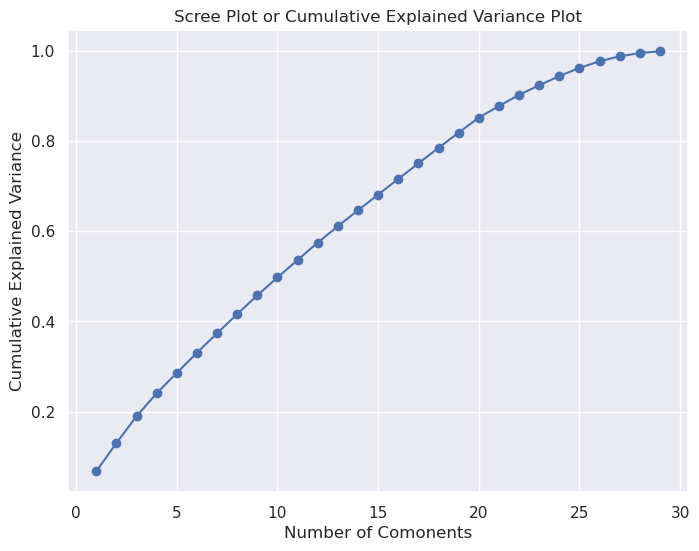

In [50]:
# CALCLATE CUMULATIVE SUM OF EXPLAINED VARIANCE RATIO
cumulative_variance = np.cumsum(explained_variance)

# PLOT THE SCREE PLOT OR CUMULATIVE EXPLAINED VARIANCE PLOT
plt.plot(range(1, len(explained_variance) + 1), cumulative_variance,marker ='o', linestyle='-')
plt.xlabel('Number of Comonents')
plt.ylabel('Cumulative Explained Variance')
plt.title('Scree Plot or Cumulative Explained Variance Plot')
plt.grid(True)
plt.show()

In [51]:
train_data_sc_pc.shape

(198608, 29)

In [52]:
cumulative_variance = np.cumsum(explained_variance)

desired_variance = 0.95
num_components = np.argmax(cumulative_variance >= desired_variance) + 1
print(f"\nNumber of Components selected:{num_components}")


Number of Components selected:25


In [53]:
train_data_sc_pc_select = train_data_sc_pc[:, :num_components]
test_data_sc_pc_select = test_data_sc_pc[:, :num_components]

In [54]:
print("train_data :", train_data_sc_pc_select.shape)
print("test_data :", test_data_sc_pc_select.shape)

train_data : (198608, 25)
test_data : (85118, 25)


In [57]:
model_lr = LogisticRegression().fit(train_data_sc_pc_select, train_label)

In [58]:
model_lr.score(train_data_sc_pc_select,train_label)

0.9985297671795698

In [59]:
y_pred_1 = model_lr.predict(test_data_sc_pc_select)
y_pred_1

array([0, 0, 0, ..., 0, 0, 0])

In [60]:
print(accuracy_score(y_pred_1, test_label))

0.9982494889447591


In [61]:
confusion_matrix(y_pred_1, test_label)

array([[84969,   129],
       [   20,     0]])

In [66]:
print(classification_report(y_pred_1,test_label))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85098
           1       0.00      0.00      0.00        20

    accuracy                           1.00     85118
   macro avg       0.50      0.50      0.50     85118
weighted avg       1.00      1.00      1.00     85118



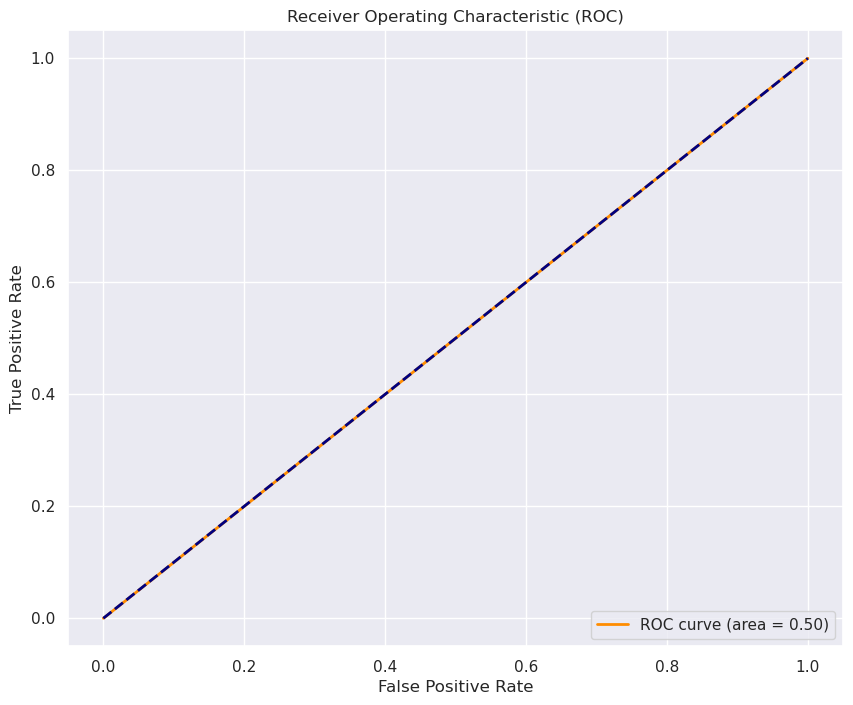

In [67]:
fpr, tpr, thresholds = roc_curve(test_label, y_pred_1)

roc_auc = auc(fpr, tpr)

plt.figure(figsize = (10, 8))
plt.plot(fpr, tpr, color = 'darkorange', lw = 2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1],[0, 1], color = 'navy', lw = 2, linestyle = '--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc = 'lower right')
plt.show()

In [69]:
print("Cross_val_score : ", cross_val_score(model_lr, test_data_sc_pc_select,test_label,cv=5).mean())

Cross_val_score :  0.9985666961969631


In [70]:
model_dt = DecisionTreeClassifier().fit(train_data_sc_pc_select,train_label)

In [72]:
y_pred_2 = model_dt.predict(test_data_sc_pc_select)

In [74]:
print('Accuracy score :',accuracy_score(y_pred_2,test_label))

Accuracy score : 0.9955473577856623


In [75]:
confusion_matrix(y_pred_2,test_label)

array([[84734,   124],
       [  255,     5]])

In [78]:
print(classification_report(y_pred_2,test_label))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     84858
           1       0.04      0.02      0.03       260

    accuracy                           1.00     85118
   macro avg       0.52      0.51      0.51     85118
weighted avg       0.99      1.00      0.99     85118



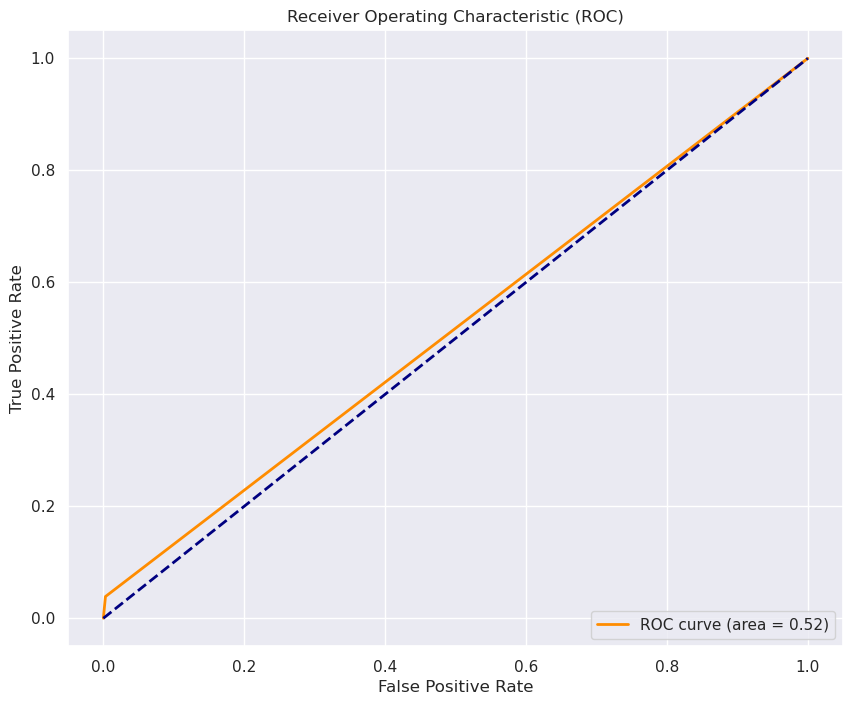

In [79]:
fpr, tpr, thresholds = roc_curve(test_label, y_pred_2)

roc_auc = auc(fpr, tpr)

plt.figure(figsize = (10, 8))
plt.plot(fpr, tpr, color = 'darkorange', lw = 2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1],[0, 1], color = 'navy', lw = 2, linestyle = '--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc = 'lower right')
plt.show()

In [80]:
print("Cross_val_score : ", cross_val_score(model_lr, test_data_sc_pc_select,test_label,cv=5).mean())

Cross_val_score :  0.9985666961969631


In [82]:
model_svm = SVC(gamma='auto').fit(train_data_sc_pc_select,train_label)

In [83]:
y_pred_3 = model_svm.predict(test_data_sc_pc_select)

In [85]:
print("Accuracy_score : ",accuracy_score(y_pred_3,test_label))

Accuracy_score :  0.9979557790361616


In [86]:
confusion_matrix(y_pred_3,test_label)

array([[84944,   129],
       [   45,     0]])

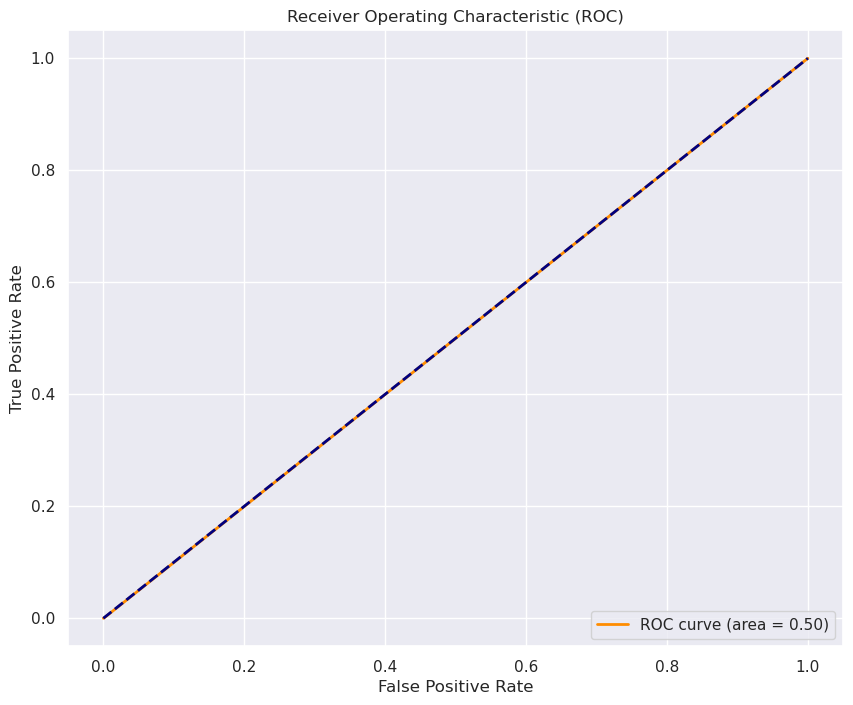

In [87]:
fpr, tpr, thresholds = roc_curve(test_label, y_pred_3)

roc_auc = auc(fpr, tpr)

plt.figure(figsize = (10, 8))
plt.plot(fpr, tpr, color = 'darkorange', lw = 2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1],[0, 1], color = 'navy', lw = 2, linestyle = '--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc = 'lower right')
plt.show()

In [88]:
print("Cross_val_score : ", cross_val_score(model_lr, test_data_sc_pc_select,test_label,cv=5).mean())

Cross_val_score :  0.9985666961969631


In [91]:
# import xgboost as xgb
!pip install xgboost


  Obtaining dependency information for xgboost from https://files.pythonhosted.org/packages/c1/cf/a662bc8f40588d54663edfe12980946670490bff0b6e793c7896a4fe36df/xgboost-2.0.0-py3-none-manylinux2014_x86_64.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 297.1/297.1 MB 907.1 kB/s eta 0:00:00 eta 0:00:01m0:00:09


In [92]:
import xgboost as xgb

In [93]:
model_xg = xgb.XGBClassifier().fit(train_data_sc_pc_select,train_label)

In [94]:
y_pred_4 = model_svm.predict(test_data_sc_pc_select)

In [95]:
print("Accuracy_score : ",accuracy_score(y_pred_4,test_label))

Accuracy_score :  0.9979557790361616


In [96]:
confusion_matrix(y_pred_4,test_label)

array([[84944,   129],
       [   45,     0]])

In [97]:
print(classification_report(y_pred_4,test_label))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85073
           1       0.00      0.00      0.00        45

    accuracy                           1.00     85118
   macro avg       0.50      0.50      0.50     85118
weighted avg       1.00      1.00      1.00     85118



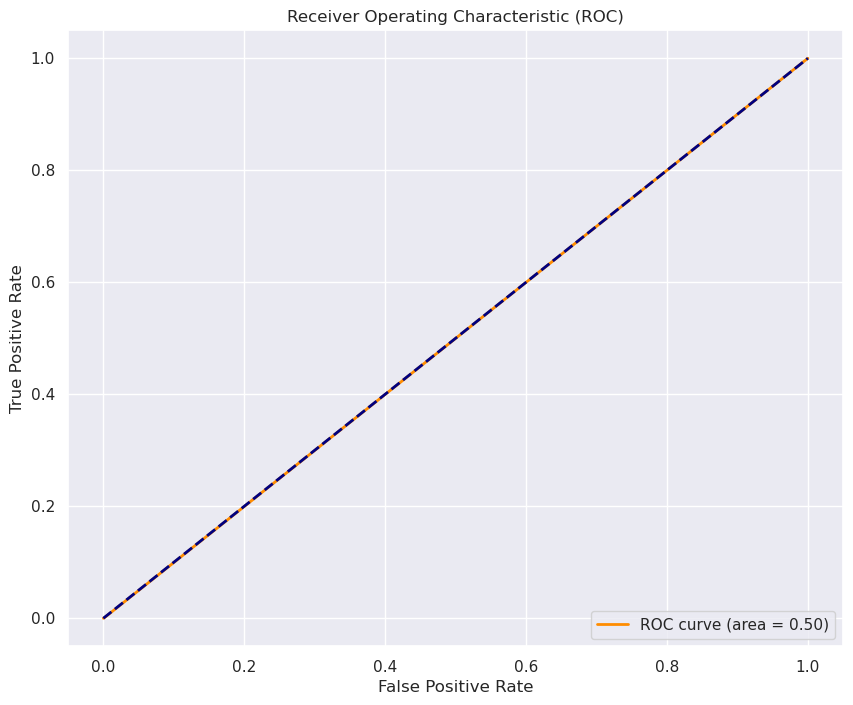

In [98]:
fpr, tpr, thresholds = roc_curve(test_label, y_pred_4)

roc_auc = auc(fpr, tpr)

plt.figure(figsize = (10, 8))
plt.plot(fpr, tpr, color = 'darkorange', lw = 2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1],[0, 1], color = 'navy', lw = 2, linestyle = '--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc = 'lower right')
plt.show()

In [99]:
print("Cross_val_score : ", cross_val_score(model_lr, test_data_sc_pc_select,test_label,cv=5).mean())

Cross_val_score :  0.9985666961969631
